数据来源于www.kaggle.com
是一个关于microsoft股票价格变动的时间序列数据集

## EDA与数据可视化

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotnine import *

import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 设置字体为微软雅黑
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号

In [3]:
data = pd.read_csv('Microsoft_Stock.csv')

In [4]:
data.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB


In [6]:
data.describe()

,Open,High,Low,Close,Volume
count,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03
mean,107.385976,108.437472,106.294533,107.422091,3.019863e+07
std,56.691333,57.382276,55.977155,56.702299,1.425266e+07
min,40.340000,40.740000,39.720000,40.290000,1.016120e+05
25%,57.860000,58.060000,57.420000,57.855000,2.136213e+07
50%,93.990000,95.100000,92.920000,93.860000,2.662962e+07
75%,139.440000,140.325000,137.825000,138.965000,3.431962e+07
max,245.030000,246.130000,242.920000,244.990000,1.352271e+08


In [7]:
data['Date'] = pd.to_datetime(data['Date']).dt.date

In [8]:
data.head()

,Date,Open,High,Low,Close,Volume
0,2015-04-01,40.60,40.76,40.31,40.72,36865322
1,2015-04-02,40.66,40.74,40.12,40.29,37487476
2,2015-04-06,40.34,41.78,40.18,41.55,39223692
3,2015-04-07,41.61,41.91,41.31,41.53,28809375
4,2015-04-08,41.48,41.69,41.04,41.42,24753438


In [9]:
# 确定时间范围
print("时间范围：", data.Date.min(), "-", data.Date.max())

时间范围： 2015-04-01 - 2021-03-31


In [10]:
df = data

### 历史开盘价与收盘价，最高价与最低价折线图

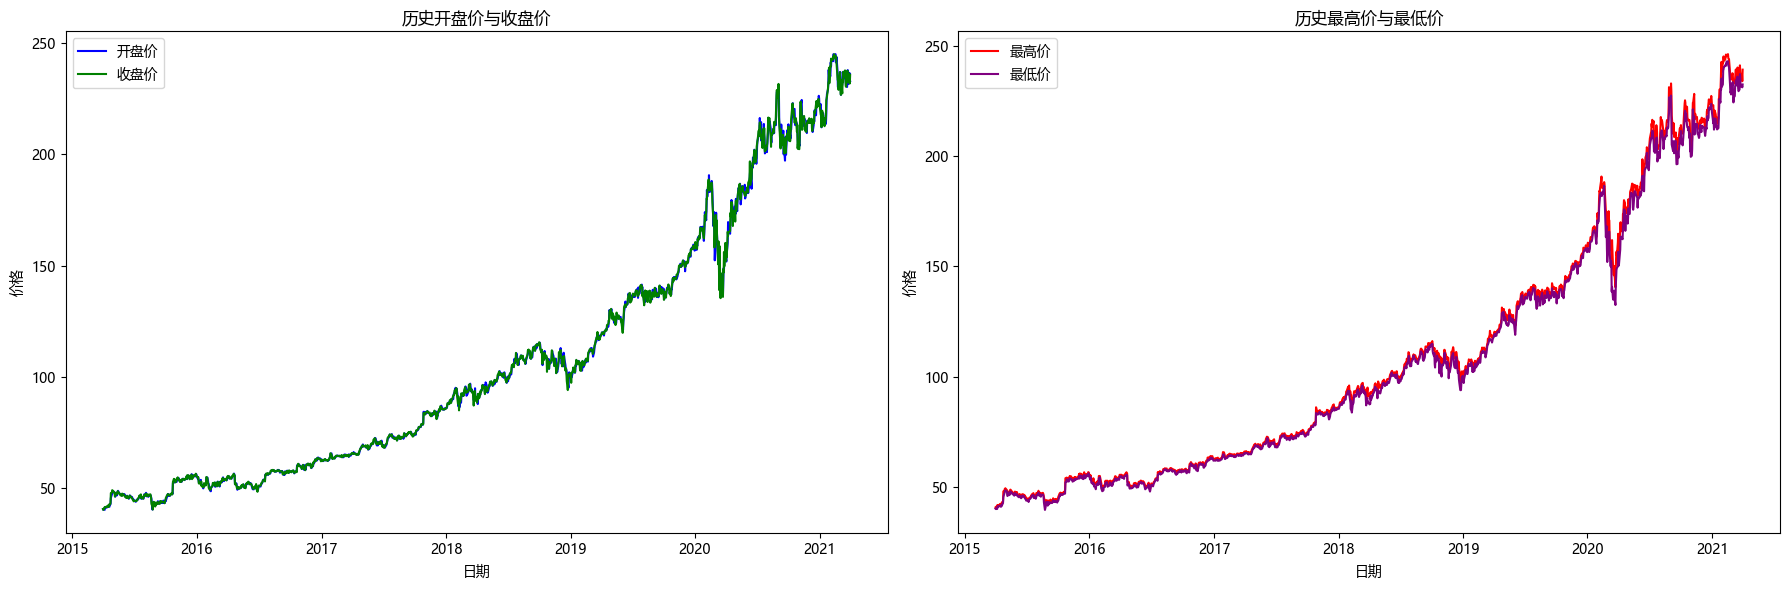

In [11]:
plt.figure(figsize=(18, 6))

# 绘制历年开盘价与收盘价折线图
plt.subplot(1, 2, 1)
plt.plot(df['Date'], df['Open'], label='开盘价', color='blue')
plt.plot(df['Date'], df['Close'], label='收盘价', color='green')
plt.title('历史开盘价与收盘价')
plt.xlabel('日期')
plt.ylabel('价格')
plt.legend()

# 绘制历年最高价与最低价折线图
plt.subplot(1, 2, 2)
plt.plot(df['Date'], df['High'], label='最高价', color='red')
plt.plot(df['Date'], df['Low'], label='最低价', color='purple')
plt.title('历史最高价与最低价')
plt.xlabel('日期')
plt.ylabel('价格')
plt.legend()

# 可视化图像展示并保存
plt.tight_layout()
plt.savefig('历史开盘价和收盘价，最高价和最低价折线图.png')
plt.show()

### 2021年的开盘价与收盘价，最高价与最低价折线图

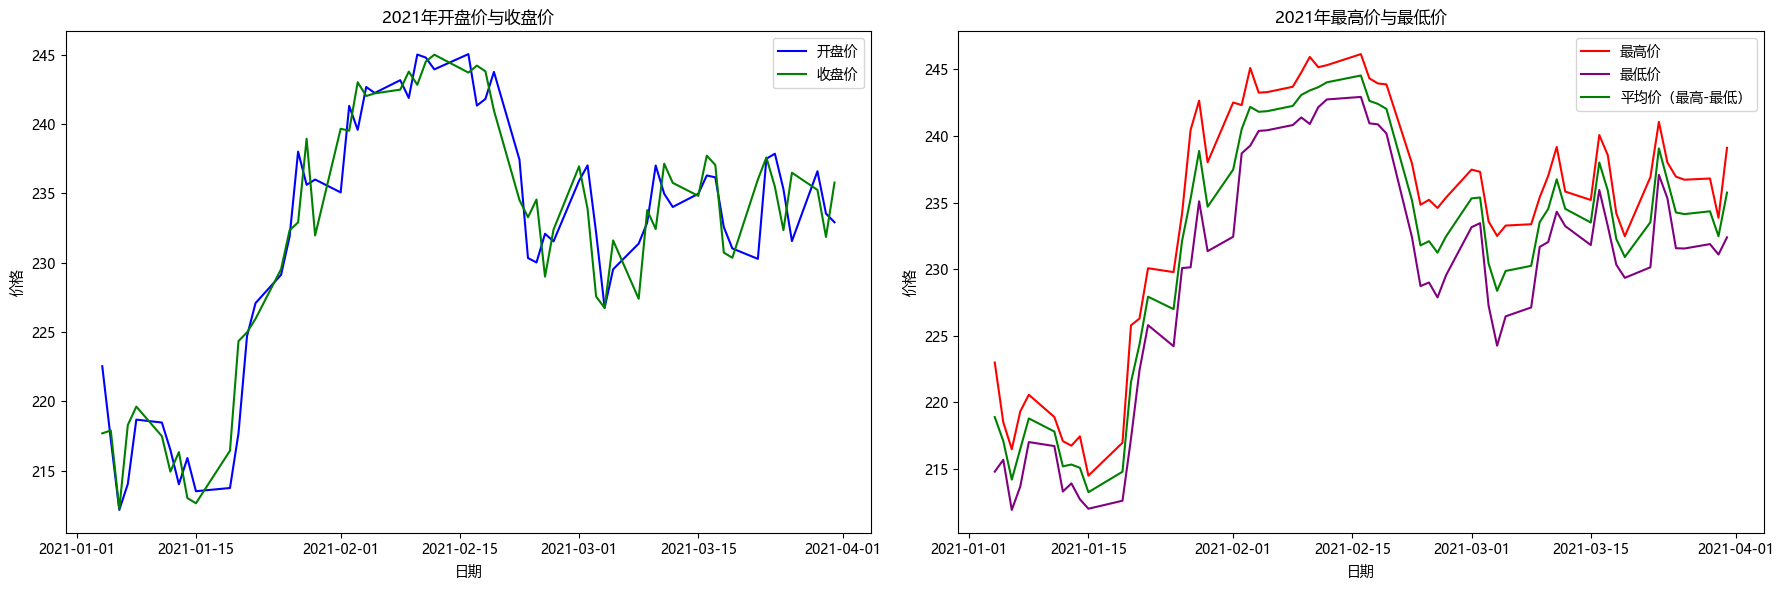

In [12]:
from datetime import datetime
df['Date'] = pd.to_datetime(df['Date'])
df_2021 = df[df.Date.dt.year == 2021]
df_2021["Mean High-Low"] = (df_2021["High"] + df_2021["Low"]) / 2

plt.figure(figsize=(18, 6))

# 绘制2021年开盘价与收盘价折线图
plt.subplot(1, 2, 1)
plt.plot(df_2021['Date'], df_2021['Open'], label='开盘价', color='blue')
plt.plot(df_2021['Date'], df_2021['Close'], label='收盘价', color='green')
plt.title('2021年开盘价与收盘价')
plt.xlabel('日期')
plt.ylabel('价格')
plt.legend()

# 绘制2021年最高价与最低价折线图
plt.subplot(1, 2, 2)
plt.plot(df_2021['Date'], df_2021['High'], label='最高价', color='red')
plt.plot(df_2021['Date'], df_2021['Low'], label='最低价', color='purple')
plt.plot(df_2021['Date'], df_2021['Mean High-Low'], label='平均价（最高-最低）', color='green')

plt.title('2021年最高价与最低价')
plt.xlabel('日期')
plt.ylabel('价格')
plt.legend()

# 保存图像并可视化展示
plt.savefig('2021开盘价与收盘价，最高价与最低价.png')
plt.tight_layout()
plt.show()

### 历史月成交量与每年成交量

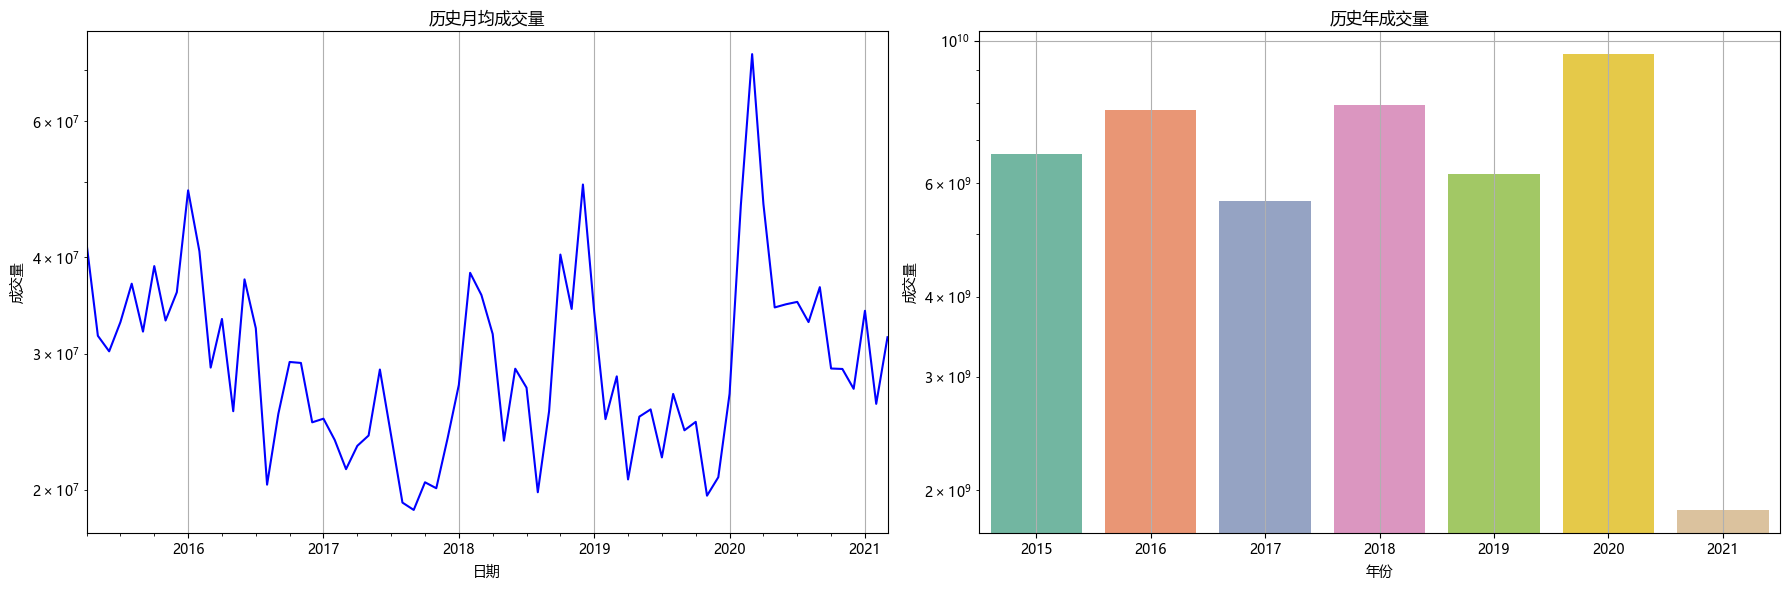

In [13]:
monthly_avg_volume = df.groupby(df.Date.dt.to_period("M")).Volume.mean().to_timestamp()
yearly_volume = df.groupby(df.Date.dt.year).Volume.sum()

# 创建子图
plt.figure(figsize=(18, 6))

# 月均成交量折线图
plt.subplot(1, 2, 1)
monthly_avg_volume.plot(color='blue')
plt.title('历史月均成交量')
plt.xlabel('日期')
plt.ylabel('成交量')
plt.yscale('log')
plt.grid(True)

# 年成交量条形图
plt.subplot(1, 2, 2)
sns.barplot(x=yearly_volume.index, y=yearly_volume, palette="Set2")
plt.title('历史年成交量')
plt.xlabel('年份')
plt.ylabel('成交量')
plt.yscale('log')
plt.grid(True)

plt.savefig('历史月成交量折线图与历史年成交量条形图.png')
plt.tight_layout()
plt.show()

### 历史每个月的总成交量和每年每月总成交量

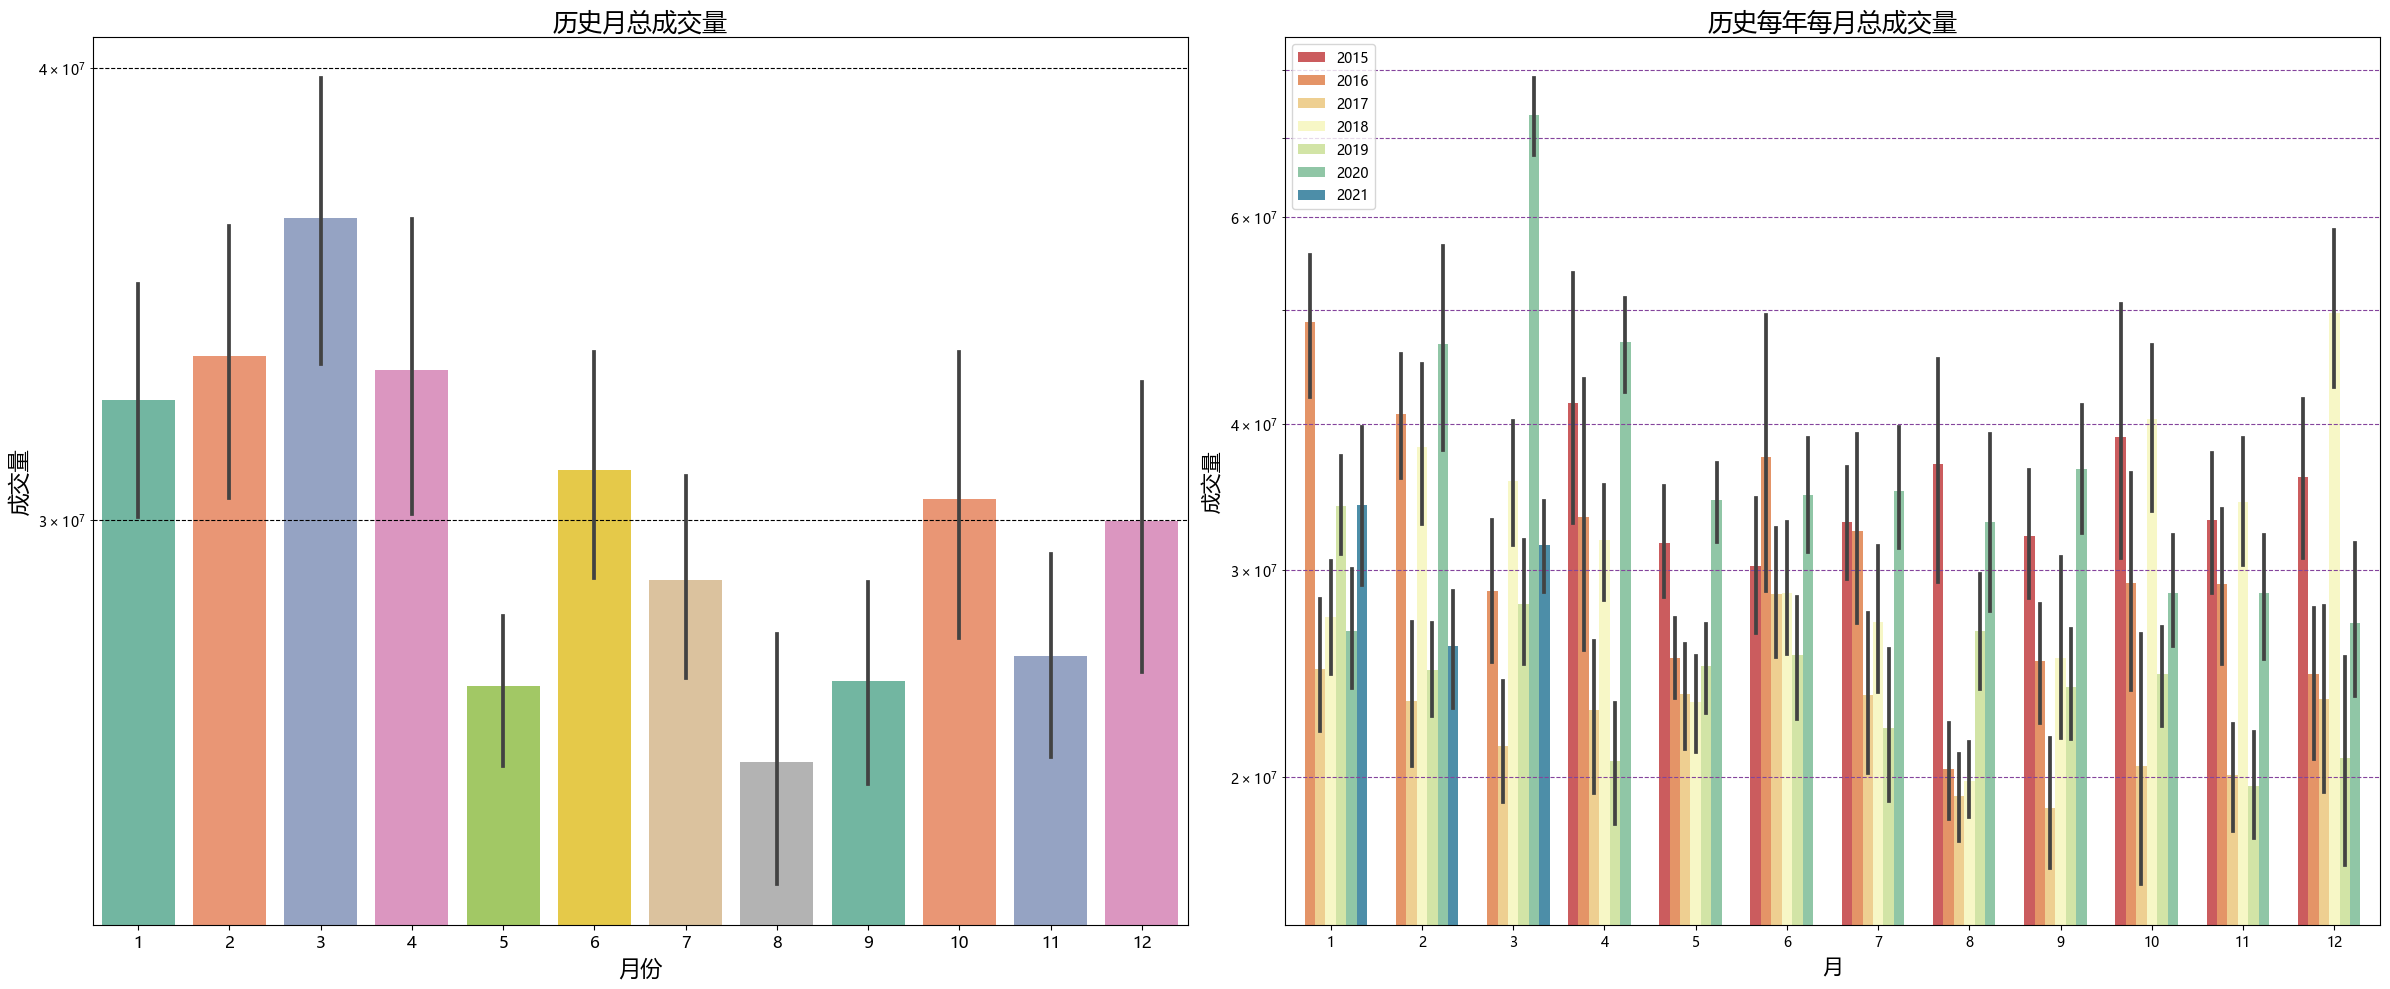

In [14]:
# 创建子图
plt.figure(figsize=(24, 10))

# 左图：历史月总成交量
plt.subplot(1, 2, 1)
sns.barplot(x=df.Date.dt.month, y=df.Volume, palette="Set2")
plt.title("历史月总成交量", fontsize=18, fontstyle="oblique")
plt.yscale("log")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, color="#3d8f6e")
plt.xlabel("月份", fontsize=16)
plt.ylabel("成交量", fontsize=16)
plt.grid(which="minor", color="black", linestyle="--")

# 右图：历史每年每月总成交量
plt.subplot(1, 2, 2)
sns.barplot(x=df.Date.dt.month, y=df.Volume, hue=df.Date.dt.year, palette="Spectral")
plt.legend(loc="upper left")
plt.yscale("log")
plt.title("历史每年每月总成交量", fontsize=18)
plt.xlabel("月", fontsize=15)
plt.ylabel("成交量", fontsize=15)
plt.grid(which="minor", color="#84449c", linestyle="--")

plt.savefig('历史月总成交量和每年每月成交量.png')
plt.tight_layout()
plt.show()

### 日历图

In [68]:
import calmap
# # 计算平均价格
df['Average'] = (df['High'] + df['Low']) / 2 

# # 准备数据
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday

In [16]:
df.set_index('Date', inplace=True)

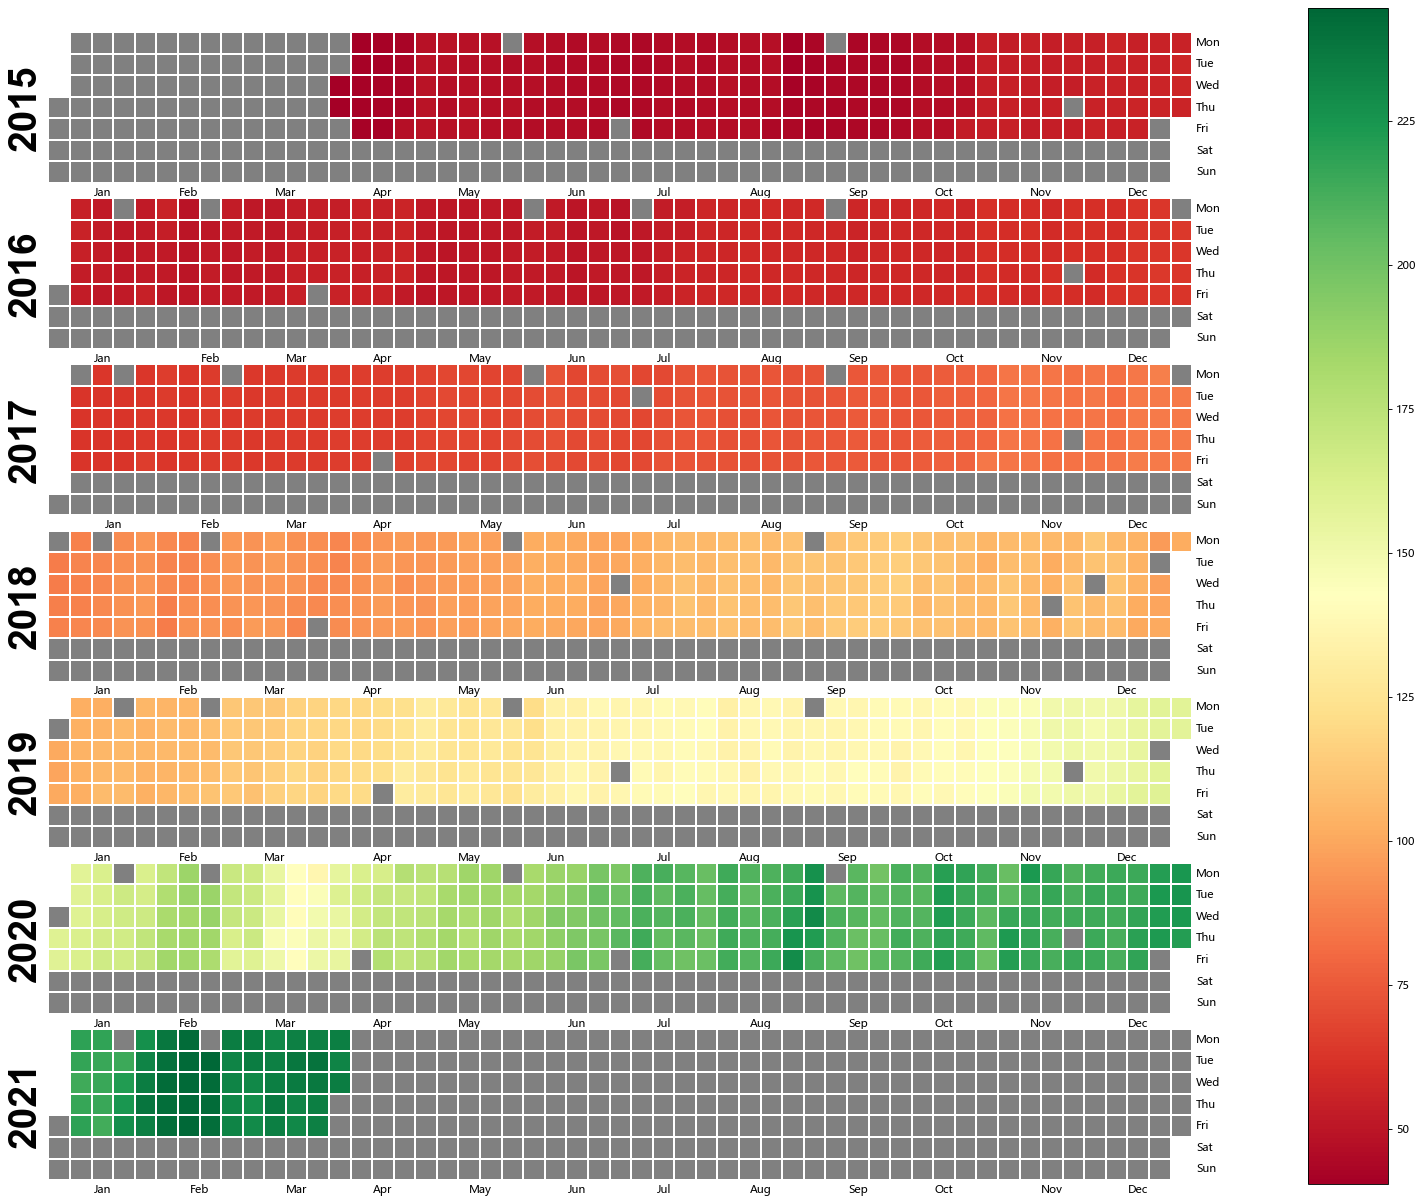

In [17]:
# 增大图像尺寸和dpi
fig_kws = {'figsize': (20, 10), 'dpi': 200}  # 调整尺寸和DPI

fig,ax = calmap.calendarplot(df['Average'],  fillcolor='grey', 
                           linecolor='w',linewidth=0.1,cmap='RdYlGn',
                           yearlabel_kws={'color':'black', 'fontsize':35},
                           fig_kws=dict(figsize=(20,15),dpi= 80))

# 创建colorbar的新轴
cax = fig.add_axes([0.93, 0.02, 0.05, 0.98])  # 参数为 [left, bottom, width, height]

# 添加colorbar到新的轴位置
fig.colorbar(ax[0].get_children()[1], cax=cax, orientation='vertical')

plt.subplots_adjust(hspace=0.1, wspace=0.05)  # 调整子图间的水平和垂直间距
plt.savefig('日历图.png', bbox_inches='tight')
plt.show()

### 坡度图

In [17]:
from mizani.formatters import date_format

In [18]:
# 对比2019和2020两年的数据
df = df[df['Year'].isin([2019, 2020])]

# 计算各月平均值并排序
avg_volume = df.groupby(['Year', 'Month'])['Volume'].mean().unstack(0)
avg_volume = avg_volume.reset_index()
# 创建坡度图的左右两列信息
left_label = avg_volume.apply(lambda x: str(x['Month']) + ',' + str(round(x[2019])), axis=1)
right_label = avg_volume.apply(lambda x: str(x['Month']) + ',' + str(round(x[2020])), axis=1)
avg_volume['class'] = avg_volume.apply(lambda x: 'red' if x[2020] < x[2019] else 'green', axis=1)
avg_volume_long = pd.melt(avg_volume, id_vars=['Month', 'class'], value_vars=[2019, 2020], 
                          var_name='Year', value_name='Volume')


avg_volume_long

,Month,class,Year,Volume
0,April,green,2019,2.062657e+07
1,August,green,2019,2.661715e+07
2,December,green,2019,2.076296e+07
3,February,green,2019,2.468926e+07
4,January,red,2019,3.400975e+07
5,July,green,2019,2.202515e+07
6,June,green,2019,2.541622e+07
7,March,green,2019,2.804978e+07
8,May,green,2019,2.487357e+07
9,November,green,2019,1.965140e+07


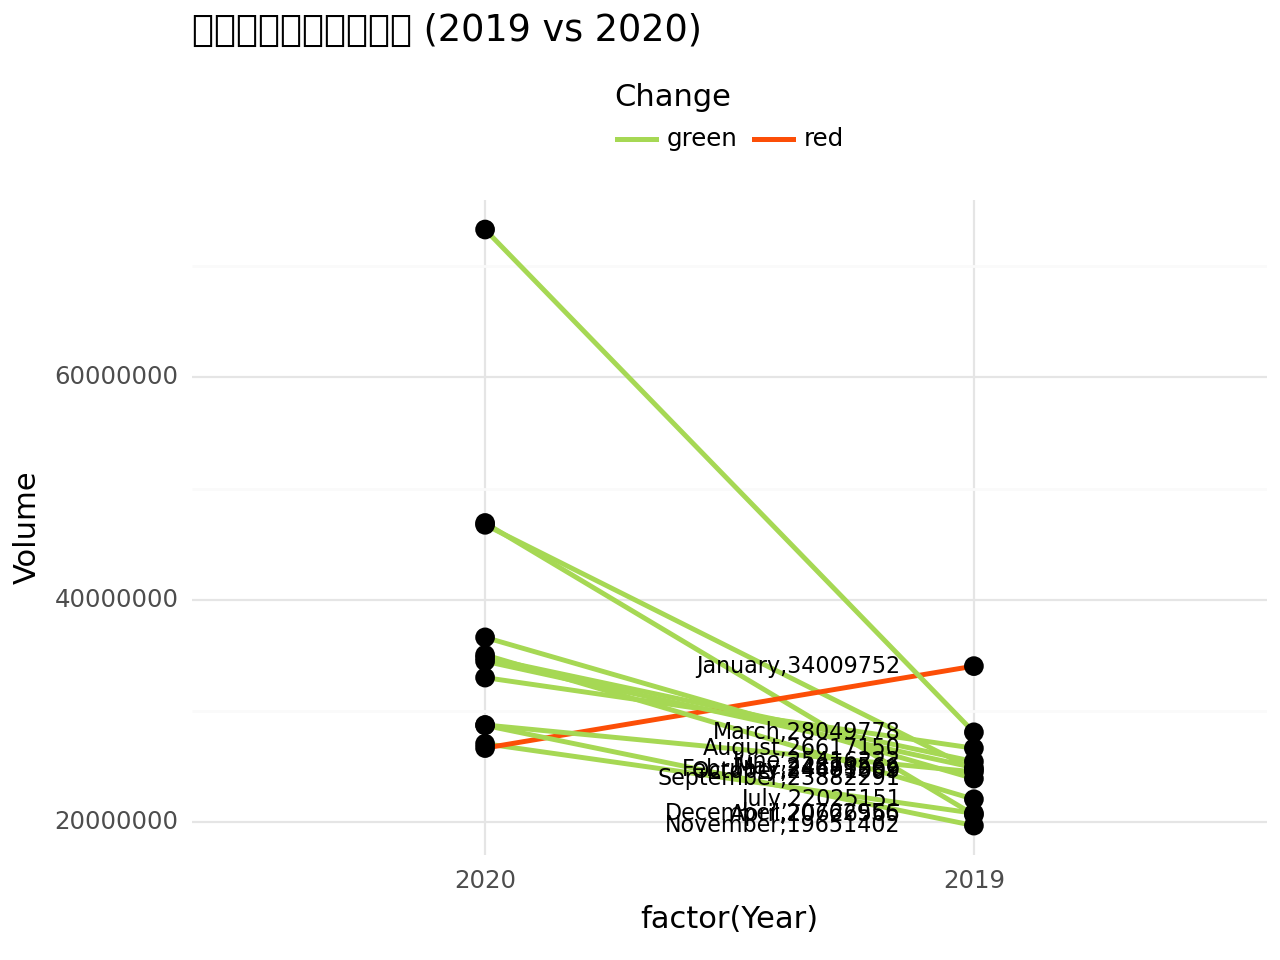

<Figure Size: (640 x 480)>

In [20]:
plot = (
    ggplot(avg_volume_long, aes(x='factor(Year)', y='Volume', group='Month')) 
    + geom_line(aes(color='class'), size=1)  
    + geom_point(size=3, shape='o', color='black')  
    + scale_color_manual(values={'green': '#A6D854', 'red': '#FC4E07'})  
    + geom_text(data=avg_volume_long[avg_volume_long['Year'] == 2019],
                mapping=aes(label=left_label), nudge_x=-0.15, ha='right', size=8) 
    + geom_text(data=avg_volume_long[avg_volume_long['Year'] == 2020],
                mapping=aes(label=right_label), nudge_x=0.15, ha='left', size=8)  
    + labs(title='每月平均成交量坡度图 (2019 vs 2020)', color='Change')
    + theme_minimal() 
    + theme(legend_position='top')  
)
plot.save(filename='2019 vs 2020坡度图.png', width=10, height=8, dpi=300)
plot

### 雷达图

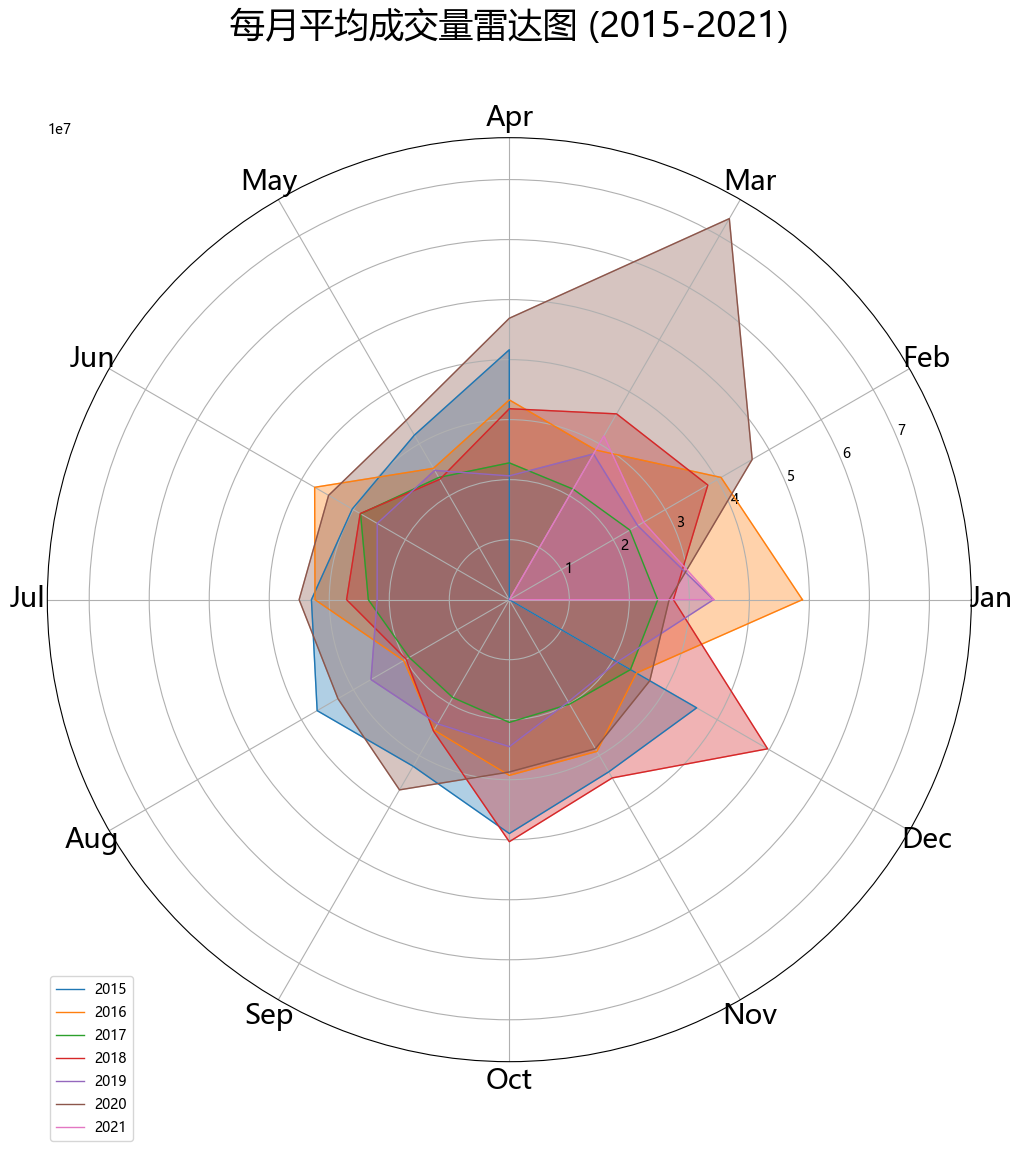

In [78]:
import calendar

# 重新加载数据
df = pd.read_csv('Microsoft_Stock.csv')
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# 筛选从2015到2021年的所有数据
df_filtered = df[df['Year'].between(2015, 2021)]

# 计算每年每月平均值
monthly_avg_volume = df.groupby(['Year', 'Month'])['Volume'].mean().unstack(0)
monthly_avg_volume = monthly_avg_volume.fillna(0)

categories = monthly_avg_volume.index
N = len(categories)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

# 准备7个颜色
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))

for i, year in enumerate(monthly_avg_volume.columns):
    values = monthly_avg_volume[year].tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=str(year), color=colors[i])
    ax.fill(angles, values, alpha=0.35, color=colors[i])

# 添加月份标签
plt.xticks(angles[:-1], [calendar.month_abbr[i] for i in range(1, 13)], color='black', size=20)
# 添加标题和图例
plt.title('每月平均成交量雷达图 (2015-2021)', size=25, color='black', y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

fig.savefig('各月南丁格尔玫瑰图.png')
plt.show()

## 2. 建模

### ARIMA模型

In [20]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

df = pd.read_csv('Microsoft_Stock.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
ts = df['Close']

adf_test = adfuller(ts, autolag='AIC')
adf_statistic = adf_test[0]
p_value = adf_test[1]
critical_values = adf_test[4]
print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)
print("Critical Values:")
for key, value in critical_values.items():
    print(f'   {key}: {value}')

if p_value < 0.05:
    print("\n序列平稳.")
else:
    print("\n序列不平稳")

ADF Statistic: 1.737136289927103
p-value: 0.9982158366942122
Critical Values:
   1%: -3.4347582315402434
   5%: -2.863486949792871
   10%: -2.567806534528638

序列不平稳


##### 1. 平稳性分析

In [21]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# 把验证序列是否满足平稳性要求的步骤封装为一个类
class TimeSeriesStationarityTester:
    def __init__(self, series):
        self.series = series
    
    # ADF平稳性检验并打印结果
    def adfuller_test(self):
        result = adfuller(self.series, autolag='AIC')
        print('ADF Statistic: %f' % result[0])
        print('p-value: %f' % result[1])
        print('Critical Values:')
        for key, value in result[4].items():
            print('\t%s: %.3f' % (key, value))

        if result[1] < 0.05:
            print("\n该时间序列平稳")
        else:
            print("\n该时间序列不平稳")

ts_tester = TimeSeriesStationarityTester(df['Close'])
ts_tester.adfuller_test()

ADF Statistic: 1.737136
p-value: 0.998216
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568

该时间序列不平稳


ADF统计量的值显然大于三个level值，不拒绝原假设，数据不平稳
##### 2.1 平稳性处理——检验对数变换的稳定性

In [22]:
# 对 'Close' 列进行对数变换
df['Log_Close'] = np.log(df['Close'])

# ADF检验
ts_tester = TimeSeriesStationarityTester(df['Log_Close'])
ts_tester.adfuller_test()

ADF Statistic: -0.128967
p-value: 0.946476
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568

该时间序列不平稳


对数变换也不平稳

##### 2.2 平稳性处理——移动平均与指数平均

In [23]:
# 在继承原时间序列类的基础上构建新类
class EnhancedTimeSeriesTester(TimeSeriesStationarityTester):
    def __init__(self, series):
        super().__init__(series)

    def moving_average(self, window):
        return self.series.rolling(window=window).mean()

    def exponential_moving_average(self, span):
        return self.series.ewm(span=span).mean()


enhanced_ts_tester = EnhancedTimeSeriesTester(df['Close'])

# 计算及验证移动平均平稳性
ma_series = enhanced_ts_tester.moving_average(window=30)
ma_series.dropna(inplace=True)
print("ADF检验—30天（一个月）移动平均:")
enhanced_ts_tester.series = ma_series
enhanced_ts_tester.adfuller_test()

# 计算和验证指数平均平稳性
ema_series = enhanced_ts_tester.exponential_moving_average(span=30)
print("\nADF检验—30天指数平均:")
enhanced_ts_tester.series = ema_series
enhanced_ts_tester.adfuller_test()

ADF检验—30天（一个月）移动平均:
ADF Statistic: 2.635222
p-value: 0.999081
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568

该时间序列不平稳

ADF检验—30天指数平均:
ADF Statistic: 2.297802
p-value: 0.998954
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568

该时间序列不平稳


仍不平稳

##### 2.3 平稳性处理——差分

In [24]:
class AdvancedTimeSeriesTester(EnhancedTimeSeriesTester):
    def __init__(self, series):
        super().__init__(series)
    
    # 差分序列，每次一阶差分
    def difference(self, order=1):
        return self.series.diff(periods=order)
    
    # 寻找使序列平稳的差分阶数
    def find_stationarity_order(self):
        max_diff_order = 10  # 最大差分阶数
        for i in range(1, max_diff_order + 1):
            differenced_series = self.difference(order=i).dropna()
            result = adfuller(differenced_series)
            if result[1] < 0.05:  
                return i
        return None  

    
df = pd.read_csv('Microsoft_Stock.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

advanced_ts_tester = AdvancedTimeSeriesTester(df['Close'])

# 找到使得序列平稳的差分阶数
diff_order = advanced_ts_tester.find_stationarity_order()
print(f"使得序列平稳的差分阶数为: {diff_order if diff_order is not None else 'Not Found'}")

使得序列平稳的差分阶数为: 1


In [25]:
# 计算一阶差分序列
diff_series = advanced_ts_tester.difference(order=1).dropna()

# 更新序列，并执行 ADF 检验
advanced_ts_tester.series = diff_series
print("一阶差分的平稳性检验（ADF）:")
advanced_ts_tester.adfuller_test()

一阶差分的平稳性检验（ADF）:
ADF Statistic: -10.038331
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568

该时间序列平稳


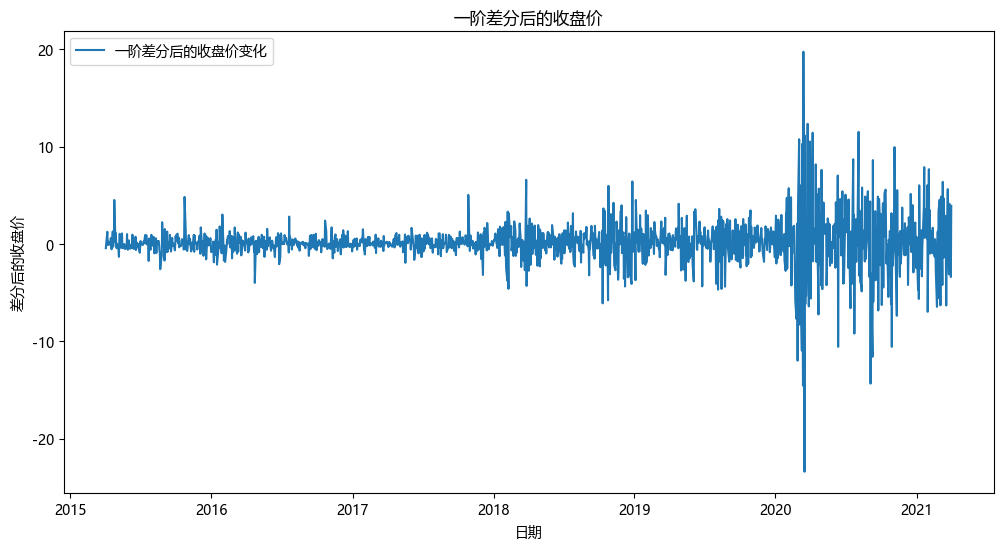

In [34]:
# 对 'Close' 列进行一阶差分
ts_diff = df['Close'].diff().dropna()

# 绘制一阶差分后的时间序列折线图
plt.figure(figsize=(12, 6))
plt.plot(ts_diff.index, ts_diff, label='一阶差分后的收盘价变化')
plt.title('一阶差分后的收盘价')
plt.xlabel('日期')
plt.ylabel('差分后的收盘价')
plt.legend()
plt.savefig('一阶差分后的时间序列折线图.png')
plt.show()

##### 2.4 平稳性检验—分解

In [27]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

class TimeSeriesDecomposer(AdvancedTimeSeriesTester):
    def __init__(self, series, model='additive', period=365):
        super().__init__(series)
        self.model = model
        self.period = period

    def decompose(self):
        # 将时序数据分离成长期趋势、季节趋势和随机成分
        decomposition = sm.tsa.seasonal_decompose(self.series, model=self.model, period=self.period)
        self.trend = decomposition.trend.dropna()
        self.seasonal = decomposition.seasonal.dropna()
        self.resid = decomposition.resid.dropna()

    def test_components(self):
        print("趋势效应的ADF检验:")
        self.series = self.trend
        self.adfuller_test()
        
        print("\n季节效应的ADF检验:")
        self.series = self.seasonal
        self.adfuller_test()
        
        print("\n随机成分的ADF检验:")
        self.series = self.resid
        self.adfuller_test()

decomposer = TimeSeriesDecomposer(df['Close'])
decomposer.decompose()
decomposer.test_components()

趋势效应的ADF检验:
ADF Statistic: 3.283857
p-value: 1.000000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568

该时间序列不平稳

季节效应的ADF检验:
ADF Statistic: -6.351540
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568

该时间序列平稳

随机成分的ADF检验:
ADF Statistic: -4.107010
p-value: 0.000943
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568

该时间序列平稳


##### 一阶差分和二阶差分后的分解，分解后趋势效应，季节效应，随机效应的平稳性检验，其中，一阶趋势效应未通过，二阶均通过

In [28]:
diff_series = decomposer.difference(order=3).dropna()

decomposer.series = diff_series
print("一阶差分的分解:")
decomposer.decompose()
decomposer.test_components()

一阶差分的分解:
趋势效应的ADF检验:
ADF Statistic: -2.198480
p-value: 0.206797
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569

该时间序列不平稳

季节效应的ADF检验:
ADF Statistic: -8.623846
p-value: 0.000000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568

该时间序列平稳

随机成分的ADF检验:
ADF Statistic: -8.139923
p-value: 0.000000
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569

该时间序列平稳


可见，将序列进行三阶差分后再分解，序列的各部分均稳定。

##### 2.5 非白噪声检验—非白噪声才能使用时间序列模型研究

In [29]:
from statsmodels.stats.diagnostic import acorr_ljungbox

class TimeSeries(TimeSeriesDecomposer):
    def __init__(self, series, model='additive', period=365):
        super().__init__(series, model=model, period=period)

    def test_for_white_noise(self):
        # 测试序列是否为非白噪声序列
        lb_test = acorr_ljungbox(self.series, lags=[10], return_df=True)
        return lb_test
        
ts = TimeSeries(df['Close'])

white_noise_test_result = ts.test_for_white_noise()
print(white_noise_test_result)
lb_pvalue = white_noise_test_result['lb_pvalue'].iloc[0]
if lb_pvalue <= 0.05:
    print("序列是非白噪声的")
else:
    print("序列是白噪声的")


         lb_stat  lb_pvalue
10  14741.691484        0.0
序列是非白噪声的


拒绝原假设，认为序列非白噪声

##### 3. ARIMA模型

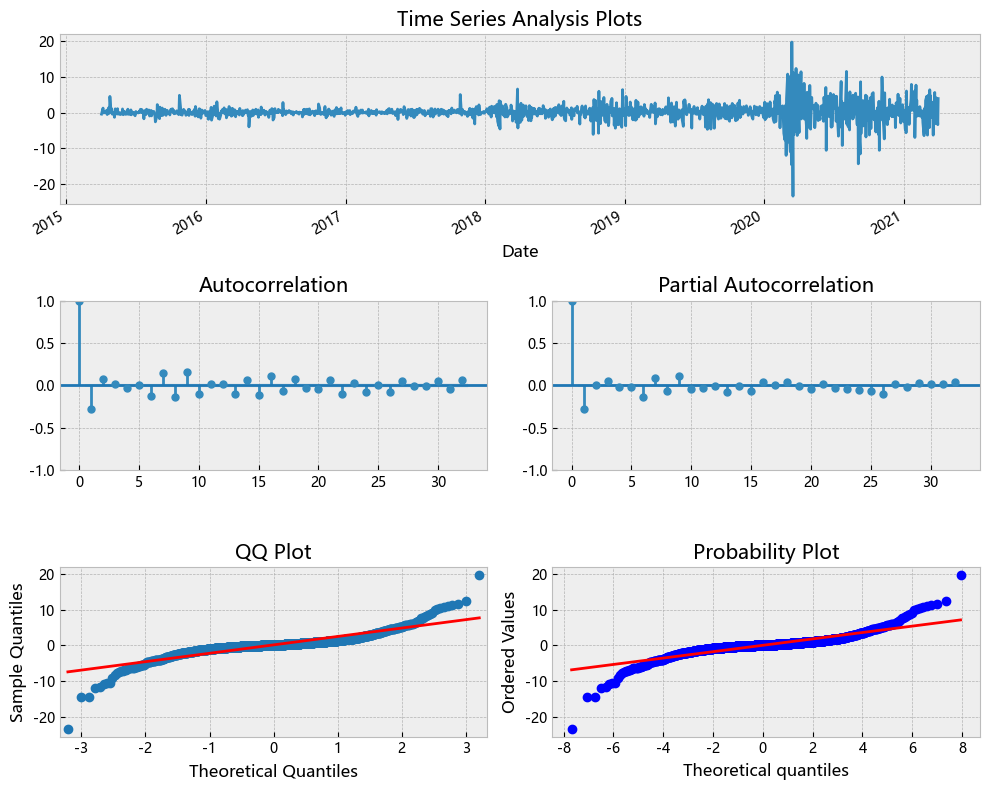

In [35]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import scipy.stats as scs
def tsplot(y, lags=None, figsize=(10, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.savefig('tsplot.png')
        plt.tight_layout()
    return 

df = pd.read_csv('Microsoft_Stock.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
diff_series = df.diff().dropna()

tsplot(diff_series['Close'])

选择出最佳的参数为p=1, d=1，q=1，再次训练

In [31]:
from statsmodels.tsa.arima.model import ARIMA

# 拟合 ARIMA 模型
model = ARIMA(diff_series['Close'], order=(1, 0, 1))  # 示例参数：p=1, d=0 (已差分), q=1
model_fit = model.fit()

# 输出模型摘要
print(model_fit.summary())

D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1510
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -3377.190
Date:                Sun, 07 Jan 2024   AIC                           6762.381
Time:                        22:06:33   BIC                           6783.660
Sample:                             0   HQIC                          6770.305
                               - 1510                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1288      0.047      2.737      0.006       0.037       0.221
ar.L1         -0.2803      0.037     -7.621      0.000      -0.352      -0.208
ma.L1          0.0059      0.039      0.150      0.8

D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.


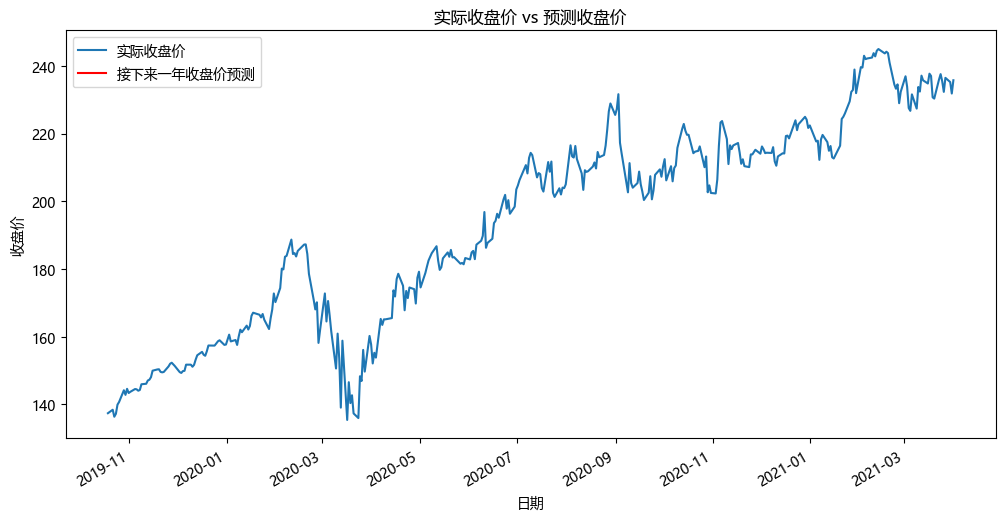

In [36]:
# 预测未来一年内的值
forecast = model_fit.get_forecast(steps=365)
forecast_index = pd.date_range(start=df.index[-1], periods=366, closed='right')
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)

# 绘制图像
plt.figure(figsize=(12, 6))
df['Close'][-365:].plot(label='实际收盘价')
forecast_series.plot(label='接下来一年收盘价预测', color='red')
plt.title('实际收盘价 vs 预测收盘价')
plt.xlabel('日期')
plt.ylabel('收盘价')
plt.legend()
plt.savefig('ARIMA预测.png')
plt.show()

### LSTM模型




Epoch 1/5

1147/1147 - 53s - loss: 0.0018 - 53s/epoch - 46ms/step
Epoch 2/5
1147/1147 - 43s - loss: 7.3049e-04 - 43s/epoch - 38ms/step
Epoch 3/5
1147/1147 - 44s - loss: 6.0180e-04 - 44s/epoch - 38ms/step
Epoch 4/5
1147/1147 - 46s - loss: 3.9515e-04 - 46s/epoch - 40ms/step
Epoch 5/5
1147/1147 - 44s - loss: 5.4877e-04 - 44s/epoch - 39ms/step
8/8 [==============================] - 0s 27ms/step
Train RMSE: 3.58
Test RMSE: 12.46


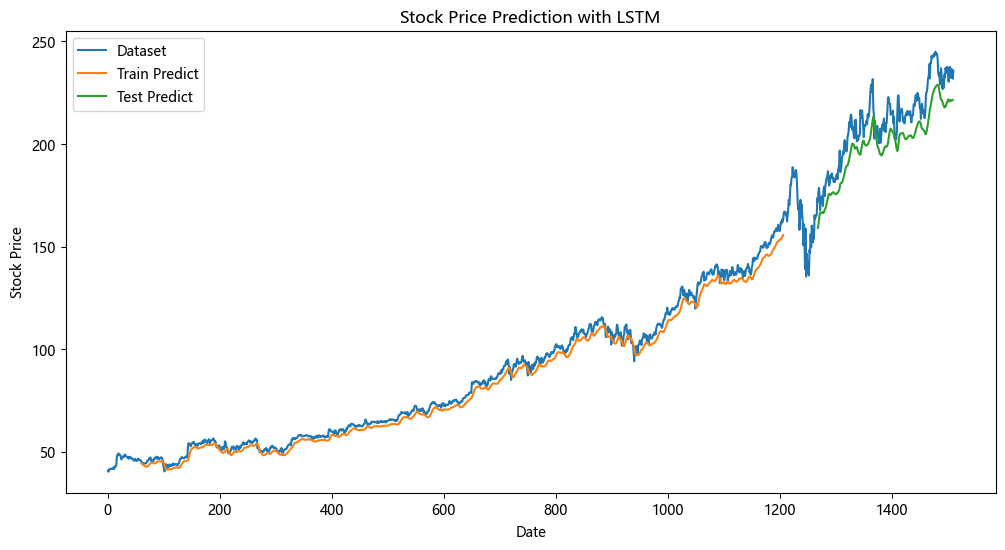

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# 收盘价数据作为预测特征
close_prices = df['Close'].values.reshape(-1, 1)

# 标准化数据
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

# 将数据分为训练集和测试集
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train, test = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :]

# 将时间序列数据转换为具有指定时间步长的数据集
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# 将数据重塑为 X=t 和 Y=t+1 的形式，X（自变量或输入）是在时间点 t 的数据， Y（因变量或输出）是在时间点 t+1 的数据。
look_back = 60
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# 数据重构为 [样本数, 时间步长, 特征数] 的格式
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# 创建和拟合LSTM模型
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, epochs=5, batch_size=1, verbose=2)

# 预测
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# 结果转换，将预测结果从归一化值转换回原始股票价格
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

# 计算均方根误差RMSE，评估模型性能
train_score = np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0]))
print('Train RMSE: %.2f' % (train_score))
test_score = np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0]))
print('Test RMSE: %.2f' % (test_score))

# 画出结果图
train_plot = np.empty_like(scaled_data)
train_plot[:, :] = np.nan
train_plot[look_back:len(train_predict)+look_back, :] = train_predict

test_plot = np.empty_like(scaled_data)
test_plot[:, :] = np.nan
test_plot[len(train_predict)+(look_back*2)+1:len(scaled_data)-1, :] = test_predict

# 绘制图像
plt.figure(figsize=(12,6))
plt.plot(scaler.inverse_transform(scaled_data), label='Dataset')
plt.plot(train_plot, label='Train Predict')
plt.plot(test_plot, label='Test Predict')
plt.title('Stock Price Prediction with LSTM')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [112]:
import itertools
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

df = pd.read_csv('Microsoft_Stock.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

close_prices = df['Close'].values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

def build_model(layers, units, dropout_rate, look_back, learning_rate=0.001):
    model = Sequential()
    model.add(LSTM(units, input_shape=(look_back, 1), return_sequences=(layers > 1)))
    for i in range(1, layers):
        model.add(LSTM(units, return_sequences=(i < layers - 1)))
        model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    optimizer = Adam(lr=learning_rate, clipnorm=1.0)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

class GradientClipping(Callback):
    def on_batch_end(self, batch, logs=None):
        if logs is not None:
            if np.any(np.isnan(logs['loss'])) or np.any(np.isinf(logs['loss'])):
                print("异常发现：梯度爆炸。正在尝试剪裁梯度...")

# 超参数选择
layer_options = [1, 2, 3]
unit_options = [50, 100, 150]
dropout_options = [0.0, 0.2, 0.5]
epoch_options = [5, 10, 20]

X, Y = create_dataset(scaled_data, look_back=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

best_rmse = float('inf')
best_config = None

for layers, units, dropout_rate, epochs in itertools.product(layer_options, unit_options, dropout_options, epoch_options):
    model = build_model(layers, units, dropout_rate, look_back=1)
    model.fit(X_train, Y_train, epochs=epochs, batch_size=32, verbose=1, callbacks=[GradientClipping()])
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(Y_test, predictions))

    if rmse < best_rmse:
        best_rmse = rmse
        best_config = (layers, units, dropout_rate, epochs)

print(f"Best RMSE: {best_rmse}")
print(f"Best Configuration: Layers={best_config[0]}, Units={best_config[1]}, Dropout={best_config[2]}, Epochs={best_config[3]}")

Epoch 1/5
38/38 [==============================] - 5s 6ms/step - loss: 0.1194
Epoch 2/5
38/38 [==============================] - 0s 6ms/step - loss: 0.0503
Epoch 3/5
38/38 [==============================] - 0s 5ms/step - loss: 0.0302
Epoch 4/5
38/38 [==============================] - 0s 5ms/step - loss: 0.0207
Epoch 5/5
10/10 [==============================] - 1s 3ms/step


Epoch 1/10
38/38 [==============================] - 5s 5ms/step - loss: 0.1136
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 0.0486
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 0.0291
Epoch 4/10
38/38 [==============================] - 0s 6ms/step - loss: 0.0203
Epoch 5/10
38/38 [==============================] - 0s 5ms/step - loss: 0.0123
Epoch 6/10
38/38 [==============================] - 0s 6ms/step - loss: 0.0061
Epoch 7/10
38/38 [==============================] - 0s 5ms/step - loss: 0.0023
Epoch 8/10
38/38 [==============================] - 0s 6ms/step - loss: 7.1705e-04
Epoch 9/10
38/38 [==============================] - 0s 5ms/step - loss: 3.0529e-04
Epoch 10/10
10/10 [==============================] - 1s 2ms/step


Epoch 1/20
38/38 [==============================] - 5s 6ms/step - loss: 0.1165
Epoch 2/20
38/38 [==============================] - 0s 6ms/step - loss: 0.0501
Epoch 3/20
38/38 [==============================] - 0s 6ms/step - loss: 0.0299
Epoch 4/20
38/38 [==============================] - 0s 6ms/step - loss: 0.0208
Epoch 5/20
38/38 [==============================] - 0s 6ms/step - loss: 0.0127
Epoch 6/20
38/38 [==============================] - 0s 5ms/step - loss: 0.0063
Epoch 7/20
38/38 [==============================] - 0s 6ms/step - loss: 0.0024
Epoch 8/20
38/38 [==============================] - 0s 6ms/step - loss: 7.7539e-04
Epoch 9/20
38/38 [==============================] - 0s 5ms/step - loss: 3.3251e-04
Epoch 10/20
38/38 [==============================] - 0s 5ms/step - loss: 2.6329e-04
Epoch 11/20
38/38 [==============================] - 0s 5ms/step - loss: 2.5481e-04
Epoch 12/20
38/38 [==============================] - 0s 6ms/step - loss: 2.5124e-04
Epoch 13/20
38/38 [==========

Epoch 1/5
38/38 [==============================] - 5s 5ms/step - loss: 0.1341
Epoch 2/5
38/38 [==============================] - 0s 6ms/step - loss: 0.0626
Epoch 3/5
38/38 [==============================] - 0s 7ms/step - loss: 0.0350
Epoch 4/5
38/38 [==============================] - 0s 6ms/step - loss: 0.0254
Epoch 5/5
10/10 [==============================] - 1s 3ms/step


Epoch 1/10
38/38 [==============================] - 5s 7ms/step - loss: 0.1306
Epoch 2/10
38/38 [==============================] - 0s 6ms/step - loss: 0.0580
Epoch 3/10
38/38 [==============================] - 0s 6ms/step - loss: 0.0341
Epoch 4/10
38/38 [==============================] - 0s 5ms/step - loss: 0.0247
Epoch 5/10
38/38 [==============================] - 0s 5ms/step - loss: 0.0161
Epoch 6/10
38/38 [==============================] - 0s 6ms/step - loss: 0.0090
Epoch 7/10
38/38 [==============================] - 0s 6ms/step - loss: 0.0041
Epoch 8/10
38/38 [==============================] - 0s 6ms/step - loss: 0.0015
Epoch 9/10
38/38 [==============================] - 0s 6ms/step - loss: 5.4017e-04
Epoch 10/10
10/10 [==============================] - 1s 5ms/step


Epoch 1/20
38/38 [==============================] - 5s 6ms/step - loss: 0.1203
Epoch 2/20
38/38 [==============================] - 0s 7ms/step - loss: 0.0531
Epoch 3/20
38/38 [==============================] - 0s 7ms/step - loss: 0.0303
Epoch 4/20
38/38 [==============================] - 0s 5ms/step - loss: 0.0214
Epoch 5/20
38/38 [==============================] - 0s 6ms/step - loss: 0.0136
Epoch 6/20
38/38 [==============================] - 0s 5ms/step - loss: 0.0073
Epoch 7/20
38/38 [==============================] - 0s 6ms/step - loss: 0.0031
Epoch 8/20
38/38 [==============================] - 0s 6ms/step - loss: 0.0011
Epoch 9/20
38/38 [==============================] - 0s 6ms/step - loss: 4.0501e-04
Epoch 10/20
38/38 [==============================] - 0s 6ms/step - loss: 2.6617e-04
Epoch 11/20
38/38 [==============================] - 0s 6ms/step - loss: 2.4702e-04
Epoch 12/20
38/38 [==============================] - 0s 6ms/step - loss: 2.4308e-04
Epoch 13/20
38/38 [==============

Epoch 1/5
38/38 [==============================] - 5s 6ms/step - loss: 0.1254
Epoch 2/5
38/38 [==============================] - 0s 6ms/step - loss: 0.0551
Epoch 3/5
38/38 [==============================] - 0s 6ms/step - loss: 0.0316
Epoch 4/5
38/38 [==============================] - 0s 5ms/step - loss: 0.0227
Epoch 5/5
10/10 [==============================] - 1s 4ms/step


Epoch 1/10
38/38 [==============================] - 5s 6ms/step - loss: 0.1307
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 0.0589
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 0.0341
Epoch 4/10
38/38 [==============================] - 0s 6ms/step - loss: 0.0247
Epoch 5/10
38/38 [==============================] - 0s 6ms/step - loss: 0.0163
Epoch 6/10
38/38 [==============================] - 0s 6ms/step - loss: 0.0092
Epoch 7/10
38/38 [==============================] - 0s 5ms/step - loss: 0.0041
Epoch 8/10
38/38 [==============================] - 0s 5ms/step - loss: 0.0015
Epoch 9/10
38/38 [==============================] - 0s 6ms/step - loss: 5.4073e-04
Epoch 10/10
10/10 [==============================] - 1s 4ms/step


Epoch 1/20
38/38 [==============================] - 5s 5ms/step - loss: 0.1616
Epoch 2/20
38/38 [==============================] - 0s 5ms/step - loss: 0.0812
Epoch 3/20
38/38 [==============================] - 0s 5ms/step - loss: 0.0454
Epoch 4/20
38/38 [==============================] - 0s 5ms/step - loss: 0.0334
Epoch 5/20
38/38 [==============================] - 0s 5ms/step - loss: 0.0236
Epoch 6/20
38/38 [==============================] - 0s 4ms/step - loss: 0.0146
Epoch 7/20
38/38 [==============================] - 0s 4ms/step - loss: 0.0075
Epoch 8/20
38/38 [==============================] - 0s 4ms/step - loss: 0.0030
Epoch 9/20
38/38 [==============================] - 0s 4ms/step - loss: 9.9716e-04
Epoch 10/20
38/38 [==============================] - 0s 5ms/step - loss: 4.3776e-04
Epoch 11/20
38/38 [==============================] - 0s 7ms/step - loss: 3.3392e-04
Epoch 12/20
38/38 [==============================] - 0s 6ms/step - loss: 3.2048e-04
Epoch 13/20
38/38 [==============

Epoch 1/5
38/38 [==============================] - 5s 5ms/step - loss: 0.1088
Epoch 2/5
38/38 [==============================] - 0s 5ms/step - loss: 0.0383
Epoch 3/5
38/38 [==============================] - 0s 5ms/step - loss: 0.0235
Epoch 4/5
38/38 [==============================] - 0s 5ms/step - loss: 0.0131
Epoch 5/5
10/10 [==============================] - 1s 3ms/step


Epoch 1/10
38/38 [==============================] - 5s 5ms/step - loss: 0.1149
Epoch 2/10
38/38 [==============================] - 0s 5ms/step - loss: 0.0418
Epoch 3/10
38/38 [==============================] - 0s 5ms/step - loss: 0.0256
Epoch 4/10
38/38 [==============================] - 0s 5ms/step - loss: 0.0149
Epoch 5/10
38/38 [==============================] - 0s 5ms/step - loss: 0.0067
Epoch 6/10
38/38 [==============================] - 0s 5ms/step - loss: 0.0021
Epoch 7/10
38/38 [==============================] - 0s 5ms/step - loss: 5.2477e-04
Epoch 8/10
38/38 [==============================] - 0s 5ms/step - loss: 2.4894e-04
Epoch 9/10
38/38 [==============================] - 0s 5ms/step - loss: 2.2625e-04
Epoch 10/10
10/10 [==============================] - 1s 3ms/step


Epoch 1/20
38/38 [==============================] - 4s 5ms/step - loss: 0.1039
Epoch 2/20
38/38 [==============================] - 0s 5ms/step - loss: 0.0362
Epoch 3/20
38/38 [==============================] - 0s 7ms/step - loss: 0.0223
Epoch 4/20
38/38 [==============================] - 0s 7ms/step - loss: 0.0118
Epoch 5/20
38/38 [==============================] - 0s 5ms/step - loss: 0.0043
Epoch 6/20
38/38 [==============================] - 0s 6ms/step - loss: 9.7163e-04
Epoch 7/20
38/38 [==============================] - 0s 6ms/step - loss: 2.7383e-04
Epoch 8/20
38/38 [==============================] - 0s 5ms/step - loss: 2.2223e-04
Epoch 9/20
38/38 [==============================] - 0s 5ms/step - loss: 2.2051e-04
Epoch 10/20
38/38 [==============================] - 0s 6ms/step - loss: 2.2361e-04
Epoch 11/20
38/38 [==============================] - 0s 5ms/step - loss: 2.1402e-04
Epoch 12/20
38/38 [==============================] - 0s 5ms/step - loss: 2.1267e-04
Epoch 13/20
38/38 [==

Epoch 1/5
38/38 [==============================] - 5s 5ms/step - loss: 0.1082
Epoch 2/5
38/38 [==============================] - 0s 5ms/step - loss: 0.0376
Epoch 3/5
38/38 [==============================] - 0s 6ms/step - loss: 0.0231
Epoch 4/5
38/38 [==============================] - 0s 5ms/step - loss: 0.0125
Epoch 5/5
10/10 [==============================] - 1s 3ms/step


Epoch 1/10
38/38 [==============================] - 5s 5ms/step - loss: 0.1253
Epoch 2/10
38/38 [==============================] - 0s 5ms/step - loss: 0.0476
Epoch 3/10
38/38 [==============================] - 0s 5ms/step - loss: 0.0287
Epoch 4/10
38/38 [==============================] - 0s 5ms/step - loss: 0.0172
Epoch 5/10
38/38 [==============================] - 0s 5ms/step - loss: 0.0078
Epoch 6/10
38/38 [==============================] - 0s 5ms/step - loss: 0.0024
Epoch 7/10
38/38 [==============================] - 0s 5ms/step - loss: 5.3594e-04
Epoch 8/10
38/38 [==============================] - 0s 5ms/step - loss: 2.4719e-04
Epoch 9/10
38/38 [==============================] - 0s 5ms/step - loss: 2.2635e-04
Epoch 10/10
10/10 [==============================] - 1s 3ms/step


Epoch 1/20
38/38 [==============================] - 5s 5ms/step - loss: 0.1288
Epoch 2/20
38/38 [==============================] - 0s 5ms/step - loss: 0.0477
Epoch 3/20
38/38 [==============================] - 0s 5ms/step - loss: 0.0295
Epoch 4/20
38/38 [==============================] - 0s 5ms/step - loss: 0.0178
Epoch 5/20
38/38 [==============================] - 0s 5ms/step - loss: 0.0084
Epoch 6/20
38/38 [==============================] - 0s 5ms/step - loss: 0.0027
Epoch 7/20
38/38 [==============================] - 0s 5ms/step - loss: 5.9874e-04
Epoch 8/20
38/38 [==============================] - 0s 5ms/step - loss: 2.5593e-04
Epoch 9/20
38/38 [==============================] - 0s 4ms/step - loss: 2.3470e-04
Epoch 10/20
38/38 [==============================] - 0s 4ms/step - loss: 2.3026e-04
Epoch 11/20
38/38 [==============================] - 0s 5ms/step - loss: 2.2797e-04
Epoch 12/20
38/38 [==============================] - 0s 5ms/step - loss: 2.2619e-04
Epoch 13/20
38/38 [======

Epoch 1/5
38/38 [==============================] - 5s 5ms/step - loss: 0.1256
Epoch 2/5
38/38 [==============================] - 0s 5ms/step - loss: 0.0469
Epoch 3/5
38/38 [==============================] - 0s 5ms/step - loss: 0.0287
Epoch 4/5
38/38 [==============================] - 0s 5ms/step - loss: 0.0174
Epoch 5/5
10/10 [==============================] - 1s 3ms/step


Epoch 1/10
38/38 [==============================] - 4s 5ms/step - loss: 0.1128
Epoch 2/10
38/38 [==============================] - 0s 5ms/step - loss: 0.0402
Epoch 3/10
38/38 [==============================] - 0s 5ms/step - loss: 0.0249
Epoch 4/10
38/38 [==============================] - 0s 5ms/step - loss: 0.0143
Epoch 5/10
38/38 [==============================] - 0s 5ms/step - loss: 0.0063
Epoch 6/10
38/38 [==============================] - 0s 7ms/step - loss: 0.0019
Epoch 7/10
38/38 [==============================] - 0s 5ms/step - loss: 4.7969e-04
Epoch 8/10
38/38 [==============================] - 0s 5ms/step - loss: 2.5330e-04
Epoch 9/10
38/38 [==============================] - 0s 6ms/step - loss: 2.3366e-04
Epoch 10/10
10/10 [==============================] - 1s 4ms/step


Epoch 1/20
38/38 [==============================] - 11s 7ms/step - loss: 0.1226
Epoch 2/20
38/38 [==============================] - 0s 8ms/step - loss: 0.0455
Epoch 3/20
38/38 [==============================] - 0s 7ms/step - loss: 0.0275
Epoch 4/20
38/38 [==============================] - 0s 6ms/step - loss: 0.0166
Epoch 5/20
38/38 [==============================] - 0s 6ms/step - loss: 0.0079
Epoch 6/20
38/38 [==============================] - 0s 6ms/step - loss: 0.0027
Epoch 7/20
38/38 [==============================] - 0s 6ms/step - loss: 6.9453e-04
Epoch 8/20
38/38 [==============================] - 0s 6ms/step - loss: 2.9241e-04
Epoch 9/20
38/38 [==============================] - 0s 7ms/step - loss: 2.4557e-04
Epoch 10/20
38/38 [==============================] - 0s 7ms/step - loss: 2.4330e-04
Epoch 11/20
38/38 [==============================] - 0s 7ms/step - loss: 2.4076e-04
Epoch 12/20
38/38 [==============================] - 0s 7ms/step - loss: 2.3745e-04
Epoch 13/20
38/38 [=====

Epoch 1/5
38/38 [==============================] - 5s 8ms/step - loss: 0.1089
Epoch 2/5
38/38 [==============================] - 0s 8ms/step - loss: 0.0364
Epoch 3/5
38/38 [==============================] - 0s 7ms/step - loss: 0.0213
Epoch 4/5
38/38 [==============================] - 0s 7ms/step - loss: 0.0099
Epoch 5/5
10/10 [==============================] - 1s 4ms/step


Epoch 1/10
38/38 [==============================] - 5s 8ms/step - loss: 0.1002
Epoch 2/10
38/38 [==============================] - 0s 9ms/step - loss: 0.0337
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 0.0198
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 0.0088
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 0.0025
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 4.7136e-04
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 2.1831e-04
Epoch 8/10
38/38 [==============================] - 0s 9ms/step - loss: 2.1150e-04
Epoch 9/10
38/38 [==============================] - 0s 8ms/step - loss: 2.1066e-04
Epoch 10/10
10/10 [==============================] - 1s 3ms/step


Epoch 1/20
38/38 [==============================] - 5s 8ms/step - loss: 0.0943
Epoch 2/20
38/38 [==============================] - 0s 8ms/step - loss: 0.0296
Epoch 3/20
38/38 [==============================] - 0s 8ms/step - loss: 0.0161
Epoch 4/20
38/38 [==============================] - 0s 8ms/step - loss: 0.0061
Epoch 5/20
38/38 [==============================] - 0s 9ms/step - loss: 0.0013
Epoch 6/20
38/38 [==============================] - 0s 7ms/step - loss: 2.6616e-04
Epoch 7/20
38/38 [==============================] - 0s 7ms/step - loss: 2.0159e-04
Epoch 8/20
38/38 [==============================] - 0s 7ms/step - loss: 2.0132e-04
Epoch 9/20
38/38 [==============================] - 0s 7ms/step - loss: 1.9875e-04
Epoch 10/20
38/38 [==============================] - 0s 7ms/step - loss: 1.9615e-04
Epoch 11/20
38/38 [==============================] - 0s 8ms/step - loss: 1.9432e-04
Epoch 12/20
38/38 [==============================] - 0s 8ms/step - loss: 1.9381e-04
Epoch 13/20
38/38 [==

Epoch 1/5
38/38 [==============================] - 5s 7ms/step - loss: 0.1050
Epoch 2/5
38/38 [==============================] - 0s 7ms/step - loss: 0.0348
Epoch 3/5
38/38 [==============================] - 0s 7ms/step - loss: 0.0204
Epoch 4/5
38/38 [==============================] - 0s 7ms/step - loss: 0.0094
Epoch 5/5
10/10 [==============================] - 1s 4ms/step


Epoch 1/10
38/38 [==============================] - 5s 7ms/step - loss: 0.0928
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 0.0291
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 0.0161
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 0.0063
Epoch 5/10
38/38 [==============================] - 0s 7ms/step - loss: 0.0014
Epoch 6/10
38/38 [==============================] - 0s 7ms/step - loss: 3.0187e-04
Epoch 7/10
38/38 [==============================] - 0s 7ms/step - loss: 2.0653e-04
Epoch 8/10
38/38 [==============================] - 0s 8ms/step - loss: 2.0307e-04
Epoch 9/10
38/38 [==============================] - 0s 7ms/step - loss: 2.0157e-04
Epoch 10/10
10/10 [==============================] - 1s 3ms/step


Epoch 1/20
38/38 [==============================] - 6s 8ms/step - loss: 0.1110
Epoch 2/20
38/38 [==============================] - 0s 8ms/step - loss: 0.0366
Epoch 3/20
38/38 [==============================] - 0s 7ms/step - loss: 0.0219
Epoch 4/20
38/38 [==============================] - 0s 7ms/step - loss: 0.0102
Epoch 5/20
38/38 [==============================] - 0s 7ms/step - loss: 0.0029
Epoch 6/20
38/38 [==============================] - 0s 7ms/step - loss: 4.9969e-04
Epoch 7/20
38/38 [==============================] - 0s 6ms/step - loss: 2.2559e-04
Epoch 8/20
38/38 [==============================] - 0s 7ms/step - loss: 2.1444e-04
Epoch 9/20
38/38 [==============================] - 0s 7ms/step - loss: 2.1271e-04
Epoch 10/20
38/38 [==============================] - 0s 7ms/step - loss: 2.1102e-04
Epoch 11/20
38/38 [==============================] - 0s 7ms/step - loss: 2.0975e-04
Epoch 12/20
38/38 [==============================] - 0s 8ms/step - loss: 2.0667e-04
Epoch 13/20
38/38 [==

Epoch 1/5
38/38 [==============================] - 5s 6ms/step - loss: 0.1154
Epoch 2/5
38/38 [==============================] - 0s 6ms/step - loss: 0.0391
Epoch 3/5
38/38 [==============================] - 0s 7ms/step - loss: 0.0223
Epoch 4/5
38/38 [==============================] - 0s 7ms/step - loss: 0.0107
Epoch 5/5
10/10 [==============================] - 1s 3ms/step


Epoch 1/10
38/38 [==============================] - 5s 8ms/step - loss: 0.1059
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 0.0340
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 0.0202
Epoch 4/10
38/38 [==============================] - 0s 7ms/step - loss: 0.0090
Epoch 5/10
38/38 [==============================] - 0s 7ms/step - loss: 0.0024
Epoch 6/10
38/38 [==============================] - 0s 7ms/step - loss: 4.3229e-04
Epoch 7/10
38/38 [==============================] - 0s 7ms/step - loss: 2.2764e-04
Epoch 8/10
38/38 [==============================] - 0s 7ms/step - loss: 2.2034e-04
Epoch 9/10
38/38 [==============================] - 0s 7ms/step - loss: 2.1799e-04
Epoch 10/10
10/10 [==============================] - 1s 4ms/step


Epoch 1/20
38/38 [==============================] - 5s 8ms/step - loss: 0.1073
Epoch 2/20
38/38 [==============================] - 0s 8ms/step - loss: 0.0352
Epoch 3/20
38/38 [==============================] - 0s 7ms/step - loss: 0.0203
Epoch 4/20
38/38 [==============================] - 0s 7ms/step - loss: 0.0094
Epoch 5/20
38/38 [==============================] - 0s 7ms/step - loss: 0.0028
Epoch 6/20
38/38 [==============================] - 0s 7ms/step - loss: 5.4742e-04
Epoch 7/20
38/38 [==============================] - 0s 7ms/step - loss: 2.3488e-04
Epoch 8/20
38/38 [==============================] - 0s 7ms/step - loss: 2.1873e-04
Epoch 9/20
38/38 [==============================] - 0s 8ms/step - loss: 2.1855e-04
Epoch 10/20
38/38 [==============================] - 0s 7ms/step - loss: 2.1629e-04
Epoch 11/20
38/38 [==============================] - 0s 7ms/step - loss: 2.1436e-04
Epoch 12/20
38/38 [==============================] - 0s 7ms/step - loss: 2.1345e-04
Epoch 13/20
38/38 [==

Epoch 1/5
38/38 [==============================] - 9s 9ms/step - loss: 0.1250
Epoch 2/5
38/38 [==============================] - 0s 10ms/step - loss: 0.0396
Epoch 3/5
38/38 [==============================] - 0s 8ms/step - loss: 0.0160
Epoch 4/5
38/38 [==============================] - 0s 8ms/step - loss: 0.0022
Epoch 5/5
10/10 [==============================] - 2s 4ms/step


Epoch 1/10
38/38 [==============================] - 9s 8ms/step - loss: 0.1257
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 0.0397
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 0.0138
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 0.0014
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 6.5332e-04
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 6.0189e-04
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 5.4898e-04
Epoch 8/10
38/38 [==============================] - 0s 8ms/step - loss: 5.0992e-04
Epoch 9/10
38/38 [==============================] - 0s 8ms/step - loss: 4.6989e-04
Epoch 10/10
10/10 [==============================] - 2s 3ms/step


Epoch 1/20
38/38 [==============================] - 9s 8ms/step - loss: 0.1273
Epoch 2/20
38/38 [==============================] - 0s 8ms/step - loss: 0.0379
Epoch 3/20
38/38 [==============================] - 0s 8ms/step - loss: 0.0140
Epoch 4/20
38/38 [==============================] - 0s 8ms/step - loss: 0.0018
Epoch 5/20
38/38 [==============================] - 0s 8ms/step - loss: 7.0787e-04
Epoch 6/20
38/38 [==============================] - 0s 7ms/step - loss: 6.7058e-04
Epoch 7/20
38/38 [==============================] - 0s 8ms/step - loss: 6.1716e-04
Epoch 8/20
38/38 [==============================] - 0s 7ms/step - loss: 5.6768e-04
Epoch 9/20
38/38 [==============================] - 0s 8ms/step - loss: 5.2511e-04
Epoch 10/20
38/38 [==============================] - 0s 10ms/step - loss: 4.7623e-04
Epoch 11/20
38/38 [==============================] - 0s 9ms/step - loss: 4.4627e-04
Epoch 12/20
38/38 [==============================] - 0s 8ms/step - loss: 3.9415e-04
Epoch 13/20
38/3

Epoch 1/5
38/38 [==============================] - 9s 9ms/step - loss: 0.1260
Epoch 2/5
38/38 [==============================] - 0s 9ms/step - loss: 0.0389
Epoch 3/5
38/38 [==============================] - 0s 8ms/step - loss: 0.0153
Epoch 4/5
38/38 [==============================] - 0s 8ms/step - loss: 0.0030
Epoch 5/5
10/10 [==============================] - 2s 3ms/step


Epoch 1/10
38/38 [==============================] - 10s 8ms/step - loss: 0.1250
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 0.0382
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 0.0151
Epoch 4/10
38/38 [==============================] - 0s 9ms/step - loss: 0.0029
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 0.0016
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 0.0016
Epoch 7/10
38/38 [==============================] - 0s 10ms/step - loss: 0.0016
Epoch 8/10
38/38 [==============================] - 0s 9ms/step - loss: 0.0015
Epoch 9/10
38/38 [==============================] - 0s 8ms/step - loss: 0.0014
Epoch 10/10
10/10 [==============================] - 2s 4ms/step


Epoch 1/20
38/38 [==============================] - 9s 8ms/step - loss: 0.1266
Epoch 2/20
38/38 [==============================] - 0s 8ms/step - loss: 0.0415
Epoch 3/20
38/38 [==============================] - 0s 8ms/step - loss: 0.0174
Epoch 4/20
38/38 [==============================] - 0s 8ms/step - loss: 0.0037
Epoch 5/20
38/38 [==============================] - 0s 8ms/step - loss: 0.0017
Epoch 6/20
38/38 [==============================] - 0s 8ms/step - loss: 0.0016
Epoch 7/20
38/38 [==============================] - 0s 8ms/step - loss: 0.0016
Epoch 8/20
38/38 [==============================] - 0s 7ms/step - loss: 0.0015
Epoch 9/20
38/38 [==============================] - 0s 7ms/step - loss: 0.0014
Epoch 10/20
38/38 [==============================] - 0s 6ms/step - loss: 0.0015
Epoch 11/20
38/38 [==============================] - 0s 8ms/step - loss: 0.0013
Epoch 12/20
38/38 [==============================] - 0s 8ms/step - loss: 0.0012
Epoch 13/20
38/38 [==============================

Epoch 1/5
38/38 [==============================] - 9s 8ms/step - loss: 0.1274
Epoch 2/5
38/38 [==============================] - 0s 8ms/step - loss: 0.0403
Epoch 3/5
38/38 [==============================] - 0s 8ms/step - loss: 0.0177
Epoch 4/5
38/38 [==============================] - 0s 8ms/step - loss: 0.0059
Epoch 5/5
10/10 [==============================] - 2s 4ms/step


Epoch 1/10
38/38 [==============================] - 10s 8ms/step - loss: 0.1282
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 0.0442
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 0.0200
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 0.0069
Epoch 5/10
38/38 [==============================] - 0s 7ms/step - loss: 0.0041
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 0.0044
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.0044
Epoch 8/10
38/38 [==============================] - 0s 7ms/step - loss: 0.0038
Epoch 9/10
38/38 [==============================] - 0s 7ms/step - loss: 0.0038
Epoch 10/10
10/10 [==============================] - 2s 4ms/step


Epoch 1/20
38/38 [==============================] - 10s 8ms/step - loss: 0.1201
Epoch 2/20
38/38 [==============================] - 0s 8ms/step - loss: 0.0385
Epoch 3/20
38/38 [==============================] - 0s 8ms/step - loss: 0.0169
Epoch 4/20
38/38 [==============================] - 0s 8ms/step - loss: 0.0055
Epoch 5/20
38/38 [==============================] - 0s 8ms/step - loss: 0.0043
Epoch 6/20
38/38 [==============================] - 0s 8ms/step - loss: 0.0041
Epoch 7/20
38/38 [==============================] - 0s 8ms/step - loss: 0.0041
Epoch 8/20
38/38 [==============================] - 0s 9ms/step - loss: 0.0040
Epoch 9/20
38/38 [==============================] - 0s 7ms/step - loss: 0.0041
Epoch 10/20
38/38 [==============================] - 0s 7ms/step - loss: 0.0038
Epoch 11/20
38/38 [==============================] - 0s 9ms/step - loss: 0.0039
Epoch 12/20
38/38 [==============================] - 0s 8ms/step - loss: 0.0040
Epoch 13/20
38/38 [=============================

Epoch 1/5
38/38 [==============================] - 10s 10ms/step - loss: 0.1020
Epoch 2/5
38/38 [==============================] - 0s 10ms/step - loss: 0.0204
Epoch 3/5
38/38 [==============================] - 0s 8ms/step - loss: 0.0024
Epoch 4/5
38/38 [==============================] - 0s 8ms/step - loss: 5.6256e-04
Epoch 5/5
10/10 [==============================] - 2s 4ms/step


Epoch 1/10
38/38 [==============================] - 10s 8ms/step - loss: 0.0938
Epoch 2/10
38/38 [==============================] - 0s 9ms/step - loss: 0.0182
Epoch 3/10
38/38 [==============================] - 0s 9ms/step - loss: 0.0013
Epoch 4/10
38/38 [==============================] - 0s 9ms/step - loss: 4.6741e-04
Epoch 5/10
38/38 [==============================] - 0s 9ms/step - loss: 4.0658e-04
Epoch 6/10
38/38 [==============================] - 0s 9ms/step - loss: 3.7750e-04
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 3.4173e-04
Epoch 8/10
38/38 [==============================] - 0s 8ms/step - loss: 3.1451e-04
Epoch 9/10
38/38 [==============================] - 0s 7ms/step - loss: 2.7940e-04
Epoch 10/10
10/10 [==============================] - 2s 4ms/step


Epoch 1/20
38/38 [==============================] - 10s 9ms/step - loss: 0.0913
Epoch 2/20
38/38 [==============================] - 0s 9ms/step - loss: 0.0196
Epoch 3/20
38/38 [==============================] - 0s 9ms/step - loss: 0.0018
Epoch 4/20
38/38 [==============================] - 0s 9ms/step - loss: 4.7442e-04
Epoch 5/20
38/38 [==============================] - 0s 8ms/step - loss: 4.2452e-04
Epoch 6/20
38/38 [==============================] - 0s 8ms/step - loss: 3.9234e-04
Epoch 7/20
38/38 [==============================] - 0s 9ms/step - loss: 3.6784e-04
Epoch 8/20
38/38 [==============================] - 0s 9ms/step - loss: 3.2975e-04
Epoch 9/20
38/38 [==============================] - 0s 9ms/step - loss: 3.0159e-04
Epoch 10/20
38/38 [==============================] - 0s 9ms/step - loss: 2.7232e-04
Epoch 11/20
38/38 [==============================] - 0s 9ms/step - loss: 2.5162e-04
Epoch 12/20
38/38 [==============================] - 0s 8ms/step - loss: 2.3039e-04
Epoch 13/20


Epoch 1/5
38/38 [==============================] - 10s 10ms/step - loss: 0.1028
Epoch 2/5
38/38 [==============================] - 0s 9ms/step - loss: 0.0208
Epoch 3/5
38/38 [==============================] - 0s 10ms/step - loss: 0.0022
Epoch 4/5
38/38 [==============================] - 0s 9ms/step - loss: 0.0011
Epoch 5/5
10/10 [==============================] - 2s 4ms/step


Epoch 1/10
38/38 [==============================] - 10s 10ms/step - loss: 0.0952
Epoch 2/10
38/38 [==============================] - 0s 9ms/step - loss: 0.0221
Epoch 3/10
38/38 [==============================] - 0s 9ms/step - loss: 0.0025
Epoch 4/10
38/38 [==============================] - 0s 9ms/step - loss: 0.0011
Epoch 5/10
38/38 [==============================] - 0s 9ms/step - loss: 0.0010
Epoch 6/10
38/38 [==============================] - 0s 9ms/step - loss: 9.3225e-04
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 8.2818e-04
Epoch 8/10
38/38 [==============================] - 0s 8ms/step - loss: 7.7372e-04
Epoch 9/10
38/38 [==============================] - 0s 9ms/step - loss: 8.0873e-04
Epoch 10/10
10/10 [==============================] - 2s 5ms/step


Epoch 1/20
38/38 [==============================] - 11s 11ms/step - loss: 0.1020
Epoch 2/20
38/38 [==============================] - 0s 11ms/step - loss: 0.0222
Epoch 3/20
38/38 [==============================] - 0s 11ms/step - loss: 0.0027
Epoch 4/20
38/38 [==============================] - 0s 10ms/step - loss: 0.0010
Epoch 5/20
38/38 [==============================] - 0s 9ms/step - loss: 9.7838e-04
Epoch 6/20
38/38 [==============================] - 0s 9ms/step - loss: 8.9088e-04
Epoch 7/20
38/38 [==============================] - 0s 10ms/step - loss: 9.2566e-04
Epoch 8/20
38/38 [==============================] - 0s 9ms/step - loss: 8.5468e-04
Epoch 9/20
38/38 [==============================] - 0s 9ms/step - loss: 8.1966e-04
Epoch 10/20
38/38 [==============================] - 0s 9ms/step - loss: 7.8689e-04
Epoch 11/20
38/38 [==============================] - 0s 10ms/step - loss: 7.9367e-04
Epoch 12/20
38/38 [==============================] - 0s 10ms/step - loss: 6.8959e-04
Epoch 13/

Epoch 1/5
38/38 [==============================] - 10s 10ms/step - loss: 0.0983
Epoch 2/5
38/38 [==============================] - 0s 10ms/step - loss: 0.0235
Epoch 3/5
38/38 [==============================] - 0s 11ms/step - loss: 0.0042
Epoch 4/5
38/38 [==============================] - 0s 11ms/step - loss: 0.0024
Epoch 5/5
10/10 [==============================] - 2s 4ms/step


Epoch 1/10
38/38 [==============================] - 15s 10ms/step - loss: 0.1002
Epoch 2/10
38/38 [==============================] - 0s 10ms/step - loss: 0.0227
Epoch 3/10
38/38 [==============================] - 0s 11ms/step - loss: 0.0040
Epoch 4/10
38/38 [==============================] - 0s 11ms/step - loss: 0.0026
Epoch 5/10
38/38 [==============================] - 0s 11ms/step - loss: 0.0021
Epoch 6/10
38/38 [==============================] - 0s 12ms/step - loss: 0.0023
Epoch 7/10
38/38 [==============================] - 0s 12ms/step - loss: 0.0024
Epoch 8/10
38/38 [==============================] - 0s 11ms/step - loss: 0.0023
Epoch 9/10
38/38 [==============================] - 0s 11ms/step - loss: 0.0021
Epoch 10/10
10/10 [==============================] - 2s 5ms/step


Epoch 1/20
38/38 [==============================] - 9s 11ms/step - loss: 0.1038
Epoch 2/20
38/38 [==============================] - 0s 11ms/step - loss: 0.0251
Epoch 3/20
38/38 [==============================] - 0s 9ms/step - loss: 0.0048
Epoch 4/20
38/38 [==============================] - 0s 9ms/step - loss: 0.0027
Epoch 5/20
38/38 [==============================] - 0s 9ms/step - loss: 0.0027
Epoch 6/20
38/38 [==============================] - 0s 10ms/step - loss: 0.0024
Epoch 7/20
38/38 [==============================] - 0s 9ms/step - loss: 0.0021
Epoch 8/20
38/38 [==============================] - 0s 10ms/step - loss: 0.0022
Epoch 9/20
38/38 [==============================] - 0s 11ms/step - loss: 0.0020
Epoch 10/20
38/38 [==============================] - 0s 10ms/step - loss: 0.0019
Epoch 11/20
38/38 [==============================] - 0s 10ms/step - loss: 0.0019
Epoch 12/20
38/38 [==============================] - 0s 9ms/step - loss: 0.0020
Epoch 13/20
38/38 [=======================

Epoch 1/5
38/38 [==============================] - 9s 12ms/step - loss: 0.0804
Epoch 2/5
38/38 [==============================] - 0s 12ms/step - loss: 0.0104
Epoch 3/5
38/38 [==============================] - 0s 11ms/step - loss: 4.6117e-04
Epoch 4/5
38/38 [==============================] - 0s 11ms/step - loss: 3.5846e-04
Epoch 5/5
10/10 [==============================] - 2s 4ms/step


Epoch 1/10
38/38 [==============================] - 10s 11ms/step - loss: 0.0814
Epoch 2/10
38/38 [==============================] - 0s 11ms/step - loss: 0.0103
Epoch 3/10
38/38 [==============================] - 0s 11ms/step - loss: 4.4084e-04
Epoch 4/10
38/38 [==============================] - 0s 11ms/step - loss: 3.5021e-04
Epoch 5/10
38/38 [==============================] - 0s 11ms/step - loss: 3.2742e-04
Epoch 6/10
38/38 [==============================] - 0s 12ms/step - loss: 2.9651e-04
Epoch 7/10
38/38 [==============================] - 0s 12ms/step - loss: 2.7906e-04
Epoch 8/10
38/38 [==============================] - 0s 13ms/step - loss: 2.4452e-04
Epoch 9/10
38/38 [==============================] - 0s 12ms/step - loss: 2.2566e-04
Epoch 10/10
10/10 [==============================] - 2s 5ms/step


Epoch 1/20
38/38 [==============================] - 10s 13ms/step - loss: 0.0795
Epoch 2/20
38/38 [==============================] - 0s 12ms/step - loss: 0.0105
Epoch 3/20
38/38 [==============================] - 0s 11ms/step - loss: 4.4277e-04
Epoch 4/20
38/38 [==============================] - 0s 11ms/step - loss: 3.3576e-04
Epoch 5/20
38/38 [==============================] - 0s 12ms/step - loss: 3.1667e-04
Epoch 6/20
38/38 [==============================] - 0s 13ms/step - loss: 2.8662e-04
Epoch 7/20
38/38 [==============================] - 0s 12ms/step - loss: 2.6591e-04
Epoch 8/20
38/38 [==============================] - 1s 13ms/step - loss: 2.3822e-04
Epoch 9/20
38/38 [==============================] - 0s 13ms/step - loss: 2.1761e-04
Epoch 10/20
38/38 [==============================] - 0s 12ms/step - loss: 2.0056e-04
Epoch 11/20
38/38 [==============================] - 0s 13ms/step - loss: 1.8457e-04
Epoch 12/20
38/38 [==============================] - 1s 14ms/step - loss: 1.8071e

Epoch 1/5
38/38 [==============================] - 9s 12ms/step - loss: 0.0819
Epoch 2/5
38/38 [==============================] - 0s 12ms/step - loss: 0.0096
Epoch 3/5
38/38 [==============================] - 0s 12ms/step - loss: 7.5133e-04
Epoch 4/5
38/38 [==============================] - 0s 13ms/step - loss: 7.3509e-04
Epoch 5/5
10/10 [==============================] - 2s 5ms/step


Epoch 1/10
38/38 [==============================] - 9s 12ms/step - loss: 0.0763
Epoch 2/10
38/38 [==============================] - 0s 12ms/step - loss: 0.0106
Epoch 3/10
38/38 [==============================] - 0s 12ms/step - loss: 8.6535e-04
Epoch 4/10
38/38 [==============================] - 0s 12ms/step - loss: 7.0280e-04
Epoch 5/10
38/38 [==============================] - 0s 13ms/step - loss: 6.5884e-04
Epoch 6/10
38/38 [==============================] - 1s 13ms/step - loss: 6.3669e-04
Epoch 7/10
38/38 [==============================] - 0s 13ms/step - loss: 5.5558e-04
Epoch 8/10
38/38 [==============================] - 0s 11ms/step - loss: 6.2778e-04
Epoch 9/10
38/38 [==============================] - 0s 12ms/step - loss: 5.1554e-04
Epoch 10/10
10/10 [==============================] - 2s 5ms/step


Epoch 1/20
38/38 [==============================] - 9s 11ms/step - loss: 0.0810
Epoch 2/20
38/38 [==============================] - 0s 11ms/step - loss: 0.0107
Epoch 3/20
38/38 [==============================] - 0s 11ms/step - loss: 8.7422e-04
Epoch 4/20
38/38 [==============================] - 0s 10ms/step - loss: 7.0168e-04
Epoch 5/20
38/38 [==============================] - 0s 12ms/step - loss: 6.9522e-04
Epoch 6/20
38/38 [==============================] - 1s 14ms/step - loss: 6.8250e-04
Epoch 7/20
38/38 [==============================] - 0s 12ms/step - loss: 6.3392e-04
Epoch 8/20
38/38 [==============================] - 0s 13ms/step - loss: 6.0552e-04
Epoch 9/20
38/38 [==============================] - 0s 12ms/step - loss: 5.5360e-04
Epoch 10/20
38/38 [==============================] - 0s 12ms/step - loss: 5.8557e-04
Epoch 11/20
38/38 [==============================] - 0s 12ms/step - loss: 5.1985e-04
Epoch 12/20
38/38 [==============================] - 0s 12ms/step - loss: 5.0452e-

Epoch 1/5
38/38 [==============================] - 10s 13ms/step - loss: 0.0834
Epoch 2/5
38/38 [==============================] - 0s 12ms/step - loss: 0.0138
Epoch 3/5
38/38 [==============================] - 0s 12ms/step - loss: 0.0017
Epoch 4/5
38/38 [==============================] - 0s 13ms/step - loss: 0.0017
Epoch 5/5
10/10 [==============================] - 2s 4ms/step


Epoch 1/10
38/38 [==============================] - 10s 11ms/step - loss: 0.0823
Epoch 2/10
38/38 [==============================] - 0s 11ms/step - loss: 0.0122
Epoch 3/10
38/38 [==============================] - 0s 11ms/step - loss: 0.0019
Epoch 4/10
38/38 [==============================] - 0s 12ms/step - loss: 0.0018
Epoch 5/10
38/38 [==============================] - 0s 13ms/step - loss: 0.0017
Epoch 6/10
38/38 [==============================] - 0s 12ms/step - loss: 0.0015
Epoch 7/10
38/38 [==============================] - 0s 12ms/step - loss: 0.0015
Epoch 8/10
38/38 [==============================] - 0s 11ms/step - loss: 0.0016
Epoch 9/10
38/38 [==============================] - 1s 13ms/step - loss: 0.0014
Epoch 10/10
10/10 [==============================] - 2s 6ms/step


Epoch 1/20
38/38 [==============================] - 10s 11ms/step - loss: 0.0849
Epoch 2/20
38/38 [==============================] - 0s 13ms/step - loss: 0.0138
Epoch 3/20
38/38 [==============================] - 0s 13ms/step - loss: 0.0021
Epoch 4/20
38/38 [==============================] - 0s 12ms/step - loss: 0.0018
Epoch 5/20
38/38 [==============================] - 0s 12ms/step - loss: 0.0018
Epoch 6/20
38/38 [==============================] - 0s 12ms/step - loss: 0.0017
Epoch 7/20
38/38 [==============================] - 0s 12ms/step - loss: 0.0016
Epoch 8/20
38/38 [==============================] - 0s 11ms/step - loss: 0.0016
Epoch 9/20
38/38 [==============================] - 0s 12ms/step - loss: 0.0016
Epoch 10/20
38/38 [==============================] - 0s 12ms/step - loss: 0.0014
Epoch 11/20
38/38 [==============================] - 0s 11ms/step - loss: 0.0016
Epoch 12/20
38/38 [==============================] - 0s 11ms/step - loss: 0.0014
Epoch 13/20
38/38 [=================

Epoch 1/5
38/38 [==============================] - 14s 10ms/step - loss: 0.1297
Epoch 2/5
38/38 [==============================] - 0s 11ms/step - loss: 0.0423
Epoch 3/5
38/38 [==============================] - 0s 10ms/step - loss: 0.0078
Epoch 4/5
38/38 [==============================] - 0s 10ms/step - loss: 0.0015
Epoch 5/5
10/10 [==============================] - 3s 5ms/step


Epoch 1/10
38/38 [==============================] - 14s 10ms/step - loss: 0.1280
Epoch 2/10
38/38 [==============================] - 0s 10ms/step - loss: 0.0398
Epoch 3/10
38/38 [==============================] - 0s 10ms/step - loss: 0.0064
Epoch 4/10
38/38 [==============================] - 0s 10ms/step - loss: 0.0013
Epoch 5/10
38/38 [==============================] - 0s 10ms/step - loss: 0.0010
Epoch 6/10
38/38 [==============================] - 0s 11ms/step - loss: 8.3168e-04
Epoch 7/10
38/38 [==============================] - 0s 11ms/step - loss: 6.8232e-04
Epoch 8/10
38/38 [==============================] - 0s 10ms/step - loss: 5.3577e-04
Epoch 9/10
38/38 [==============================] - 0s 10ms/step - loss: 4.1492e-04
Epoch 10/10
10/10 [==============================] - 3s 5ms/step


Epoch 1/20
38/38 [==============================] - 14s 11ms/step - loss: 0.1269
Epoch 2/20
38/38 [==============================] - 0s 11ms/step - loss: 0.0407
Epoch 3/20
38/38 [==============================] - 0s 11ms/step - loss: 0.0067
Epoch 4/20
38/38 [==============================] - 0s 10ms/step - loss: 0.0013
Epoch 5/20
38/38 [==============================] - 0s 9ms/step - loss: 0.0010
Epoch 6/20
38/38 [==============================] - 0s 9ms/step - loss: 8.3664e-04
Epoch 7/20
38/38 [==============================] - 0s 10ms/step - loss: 6.7810e-04
Epoch 8/20
38/38 [==============================] - 0s 10ms/step - loss: 5.3615e-04
Epoch 9/20
38/38 [==============================] - 0s 10ms/step - loss: 4.2319e-04
Epoch 10/20
38/38 [==============================] - 0s 10ms/step - loss: 3.2755e-04
Epoch 11/20
38/38 [==============================] - 0s 11ms/step - loss: 2.5263e-04
Epoch 12/20
38/38 [==============================] - 0s 10ms/step - loss: 2.0840e-04
Epoch 13/2

Epoch 1/5
38/38 [==============================] - 14s 11ms/step - loss: 0.1318
Epoch 2/5
38/38 [==============================] - 0s 11ms/step - loss: 0.0415
Epoch 3/5
38/38 [==============================] - 0s 10ms/step - loss: 0.0100
Epoch 4/5
38/38 [==============================] - 0s 10ms/step - loss: 0.0032
Epoch 5/5
10/10 [==============================] - 3s 5ms/step


Epoch 1/10
38/38 [==============================] - 15s 11ms/step - loss: 0.1294
Epoch 2/10
38/38 [==============================] - 0s 11ms/step - loss: 0.0378
Epoch 3/10
38/38 [==============================] - 0s 11ms/step - loss: 0.0077
Epoch 4/10
38/38 [==============================] - 0s 10ms/step - loss: 0.0034
Epoch 5/10
38/38 [==============================] - 0s 10ms/step - loss: 0.0033
Epoch 6/10
38/38 [==============================] - 0s 11ms/step - loss: 0.0030
Epoch 7/10
38/38 [==============================] - 0s 11ms/step - loss: 0.0027
Epoch 8/10
38/38 [==============================] - 0s 11ms/step - loss: 0.0027
Epoch 9/10
38/38 [==============================] - 0s 12ms/step - loss: 0.0021
Epoch 10/10
10/10 [==============================] - 3s 5ms/step


Epoch 1/20
38/38 [==============================] - 14s 10ms/step - loss: 0.1308
Epoch 2/20
38/38 [==============================] - 0s 9ms/step - loss: 0.0488
Epoch 3/20
38/38 [==============================] - 0s 9ms/step - loss: 0.0144
Epoch 4/20
38/38 [==============================] - 0s 9ms/step - loss: 0.0037
Epoch 5/20
38/38 [==============================] - 0s 10ms/step - loss: 0.0036
Epoch 6/20
38/38 [==============================] - 0s 9ms/step - loss: 0.0029
Epoch 7/20
38/38 [==============================] - 0s 10ms/step - loss: 0.0027
Epoch 8/20
38/38 [==============================] - 0s 10ms/step - loss: 0.0028
Epoch 9/20
38/38 [==============================] - 0s 10ms/step - loss: 0.0025
Epoch 10/20
38/38 [==============================] - 0s 9ms/step - loss: 0.0021
Epoch 11/20
38/38 [==============================] - 0s 9ms/step - loss: 0.0018
Epoch 12/20
38/38 [==============================] - 0s 10ms/step - loss: 0.0020
Epoch 13/20
38/38 [=======================

Epoch 1/5
38/38 [==============================] - 14s 12ms/step - loss: 0.1367
Epoch 2/5
38/38 [==============================] - 0s 10ms/step - loss: 0.0474
Epoch 3/5
38/38 [==============================] - 0s 11ms/step - loss: 0.0179
Epoch 4/5
38/38 [==============================] - 0s 11ms/step - loss: 0.0098
Epoch 5/5
10/10 [==============================] - 3s 6ms/step


Epoch 1/10
38/38 [==============================] - 15s 13ms/step - loss: 0.1302
Epoch 2/10
38/38 [==============================] - 0s 11ms/step - loss: 0.0454
Epoch 3/10
38/38 [==============================] - 0s 11ms/step - loss: 0.0170
Epoch 4/10
38/38 [==============================] - 0s 10ms/step - loss: 0.0092
Epoch 5/10
38/38 [==============================] - 0s 11ms/step - loss: 0.0080
Epoch 6/10
38/38 [==============================] - 0s 11ms/step - loss: 0.0083
Epoch 7/10
38/38 [==============================] - 0s 11ms/step - loss: 0.0072
Epoch 8/10
38/38 [==============================] - 0s 11ms/step - loss: 0.0066
Epoch 9/10
38/38 [==============================] - 0s 11ms/step - loss: 0.0068
Epoch 10/10
10/10 [==============================] - 3s 5ms/step


Epoch 1/20
38/38 [==============================] - 15s 11ms/step - loss: 0.1311
Epoch 2/20
38/38 [==============================] - 0s 11ms/step - loss: 0.0472
Epoch 3/20
38/38 [==============================] - 0s 11ms/step - loss: 0.0177
Epoch 4/20
38/38 [==============================] - 0s 11ms/step - loss: 0.0083
Epoch 5/20
38/38 [==============================] - 0s 11ms/step - loss: 0.0066
Epoch 6/20
38/38 [==============================] - 0s 11ms/step - loss: 0.0078
Epoch 7/20
38/38 [==============================] - 0s 11ms/step - loss: 0.0067
Epoch 8/20
38/38 [==============================] - 0s 11ms/step - loss: 0.0074
Epoch 9/20
38/38 [==============================] - 0s 11ms/step - loss: 0.0062
Epoch 10/20
38/38 [==============================] - 0s 11ms/step - loss: 0.0053
Epoch 11/20
38/38 [==============================] - 0s 11ms/step - loss: 0.0050
Epoch 12/20
38/38 [==============================] - 0s 11ms/step - loss: 0.0057
Epoch 13/20
38/38 [=================

Epoch 1/5
38/38 [==============================] - 21s 13ms/step - loss: 0.1037
Epoch 2/5
38/38 [==============================] - 1s 14ms/step - loss: 0.0189
Epoch 3/5
38/38 [==============================] - 0s 13ms/step - loss: 0.0011
Epoch 4/5
38/38 [==============================] - 0s 13ms/step - loss: 7.0297e-04
Epoch 5/5
10/10 [==============================] - 3s 6ms/step


Epoch 1/10
38/38 [==============================] - 14s 13ms/step - loss: 0.0987
Epoch 2/10
38/38 [==============================] - 0s 11ms/step - loss: 0.0189
Epoch 3/10
38/38 [==============================] - 0s 12ms/step - loss: 0.0011
Epoch 4/10
38/38 [==============================] - 0s 11ms/step - loss: 6.9072e-04
Epoch 5/10
38/38 [==============================] - 0s 12ms/step - loss: 5.2745e-04
Epoch 6/10
38/38 [==============================] - 0s 12ms/step - loss: 4.3444e-04
Epoch 7/10
38/38 [==============================] - 0s 12ms/step - loss: 3.2518e-04
Epoch 8/10
38/38 [==============================] - 0s 12ms/step - loss: 2.6245e-04
Epoch 9/10
38/38 [==============================] - 0s 12ms/step - loss: 2.1000e-04
Epoch 10/10
10/10 [==============================] - 3s 7ms/step


Epoch 1/20
38/38 [==============================] - 13s 13ms/step - loss: 0.1018
Epoch 2/20
38/38 [==============================] - 0s 13ms/step - loss: 0.0200
Epoch 3/20
38/38 [==============================] - 0s 13ms/step - loss: 0.0010
Epoch 4/20
38/38 [==============================] - 0s 12ms/step - loss: 6.6670e-04
Epoch 5/20
38/38 [==============================] - 0s 12ms/step - loss: 5.2362e-04
Epoch 6/20
38/38 [==============================] - 0s 13ms/step - loss: 4.0992e-04
Epoch 7/20
38/38 [==============================] - 0s 13ms/step - loss: 3.3915e-04
Epoch 8/20
38/38 [==============================] - 1s 14ms/step - loss: 2.5146e-04
Epoch 9/20
38/38 [==============================] - 0s 13ms/step - loss: 2.0544e-04
Epoch 10/20
38/38 [==============================] - 0s 13ms/step - loss: 1.7560e-04
Epoch 11/20
38/38 [==============================] - 0s 12ms/step - loss: 1.5706e-04
Epoch 12/20
38/38 [==============================] - 0s 12ms/step - loss: 1.5802e-04


Epoch 1/5
38/38 [==============================] - 14s 14ms/step - loss: 0.1013
Epoch 2/5
38/38 [==============================] - 1s 13ms/step - loss: 0.0204
Epoch 3/5
38/38 [==============================] - 0s 13ms/step - loss: 0.0021
Epoch 4/5
38/38 [==============================] - 0s 13ms/step - loss: 0.0017
Epoch 5/5
10/10 [==============================] - 3s 5ms/step


Epoch 1/10
38/38 [==============================] - 13s 12ms/step - loss: 0.1011
Epoch 2/10
38/38 [==============================] - 1s 13ms/step - loss: 0.0216
Epoch 3/10
38/38 [==============================] - 0s 13ms/step - loss: 0.0020
Epoch 4/10
38/38 [==============================] - 0s 13ms/step - loss: 0.0017
Epoch 5/10
38/38 [==============================] - 0s 13ms/step - loss: 0.0016
Epoch 6/10
38/38 [==============================] - 0s 13ms/step - loss: 0.0013
Epoch 7/10
38/38 [==============================] - 1s 14ms/step - loss: 0.0012
Epoch 8/10
38/38 [==============================] - 0s 12ms/step - loss: 0.0014
Epoch 9/10
38/38 [==============================] - 0s 13ms/step - loss: 0.0013
Epoch 10/10
10/10 [==============================] - 3s 5ms/step


Epoch 1/20
38/38 [==============================] - 13s 12ms/step - loss: 0.1077
Epoch 2/20
38/38 [==============================] - 0s 13ms/step - loss: 0.0180
Epoch 3/20
38/38 [==============================] - 0s 13ms/step - loss: 0.0020
Epoch 4/20
38/38 [==============================] - 0s 13ms/step - loss: 0.0020
Epoch 5/20
38/38 [==============================] - 1s 14ms/step - loss: 0.0016
Epoch 6/20
38/38 [==============================] - 0s 13ms/step - loss: 0.0015
Epoch 7/20
38/38 [==============================] - 0s 12ms/step - loss: 0.0013
Epoch 8/20
38/38 [==============================] - 0s 12ms/step - loss: 0.0012
Epoch 9/20
38/38 [==============================] - 1s 13ms/step - loss: 0.0012
Epoch 10/20
38/38 [==============================] - 0s 13ms/step - loss: 9.7418e-04
Epoch 11/20
38/38 [==============================] - 0s 13ms/step - loss: 9.9411e-04
Epoch 12/20
38/38 [==============================] - 0s 12ms/step - loss: 0.0011
Epoch 13/20
38/38 [=========

Epoch 1/5
38/38 [==============================] - 13s 14ms/step - loss: 0.1096
Epoch 2/5
38/38 [==============================] - 1s 13ms/step - loss: 0.0234
Epoch 3/5
38/38 [==============================] - 1s 13ms/step - loss: 0.0047
Epoch 4/5
38/38 [==============================] - 1s 13ms/step - loss: 0.0043
Epoch 5/5
10/10 [==============================] - 3s 6ms/step


Epoch 1/10
38/38 [==============================] - 14s 14ms/step - loss: 0.1008
Epoch 2/10
38/38 [==============================] - 1s 15ms/step - loss: 0.0214
Epoch 3/10
38/38 [==============================] - 0s 13ms/step - loss: 0.0046
Epoch 4/10
38/38 [==============================] - 0s 13ms/step - loss: 0.0040
Epoch 5/10
38/38 [==============================] - 0s 12ms/step - loss: 0.0046
Epoch 6/10
38/38 [==============================] - 1s 14ms/step - loss: 0.0033
Epoch 7/10
38/38 [==============================] - 0s 12ms/step - loss: 0.0035
Epoch 8/10
38/38 [==============================] - 0s 12ms/step - loss: 0.0035
Epoch 9/10
38/38 [==============================] - 0s 12ms/step - loss: 0.0034
Epoch 10/10
10/10 [==============================] - 3s 5ms/step


Epoch 1/20
38/38 [==============================] - 14s 16ms/step - loss: 0.1076
Epoch 2/20
38/38 [==============================] - 1s 14ms/step - loss: 0.0232
Epoch 3/20
38/38 [==============================] - 0s 12ms/step - loss: 0.0052
Epoch 4/20
38/38 [==============================] - 0s 12ms/step - loss: 0.0047
Epoch 5/20
38/38 [==============================] - 0s 13ms/step - loss: 0.0038
Epoch 6/20
38/38 [==============================] - 0s 13ms/step - loss: 0.0039
Epoch 7/20
38/38 [==============================] - 0s 13ms/step - loss: 0.0035
Epoch 8/20
38/38 [==============================] - 0s 13ms/step - loss: 0.0038
Epoch 9/20
38/38 [==============================] - 1s 13ms/step - loss: 0.0032
Epoch 10/20
38/38 [==============================] - 0s 13ms/step - loss: 0.0034
Epoch 11/20
38/38 [==============================] - 1s 14ms/step - loss: 0.0030
Epoch 12/20
38/38 [==============================] - 1s 14ms/step - loss: 0.0029
Epoch 13/20
38/38 [=================

Epoch 1/5
38/38 [==============================] - 14s 17ms/step - loss: 0.0908
Epoch 2/5
38/38 [==============================] - 1s 15ms/step - loss: 0.0103
Epoch 3/5
38/38 [==============================] - 1s 15ms/step - loss: 7.2011e-04
Epoch 4/5
38/38 [==============================] - 1s 16ms/step - loss: 4.5368e-04
Epoch 5/5
10/10 [==============================] - 3s 6ms/step


Epoch 1/10
38/38 [==============================] - 14s 18ms/step - loss: 0.0878
Epoch 2/10
38/38 [==============================] - 1s 15ms/step - loss: 0.0089
Epoch 3/10
38/38 [==============================] - 1s 15ms/step - loss: 7.0200e-04
Epoch 4/10
38/38 [==============================] - 1s 15ms/step - loss: 4.5997e-04
Epoch 5/10
38/38 [==============================] - 1s 17ms/step - loss: 3.4371e-04
Epoch 6/10
38/38 [==============================] - 1s 17ms/step - loss: 2.6379e-04
Epoch 7/10
38/38 [==============================] - 1s 16ms/step - loss: 2.1907e-04
Epoch 8/10
38/38 [==============================] - 1s 16ms/step - loss: 1.7661e-04
Epoch 9/10
38/38 [==============================] - 1s 16ms/step - loss: 1.7072e-04
Epoch 10/10
10/10 [==============================] - 3s 5ms/step


Epoch 1/20
38/38 [==============================] - 13s 18ms/step - loss: 0.0868
Epoch 2/20
38/38 [==============================] - 1s 17ms/step - loss: 0.0079
Epoch 3/20
38/38 [==============================] - 1s 17ms/step - loss: 7.2589e-04
Epoch 4/20
38/38 [==============================] - 1s 17ms/step - loss: 3.9350e-04
Epoch 5/20
38/38 [==============================] - 1s 17ms/step - loss: 2.9306e-04
Epoch 6/20
38/38 [==============================] - 1s 15ms/step - loss: 2.4217e-04
Epoch 7/20
38/38 [==============================] - 1s 16ms/step - loss: 2.0105e-04
Epoch 8/20
38/38 [==============================] - 1s 16ms/step - loss: 1.7205e-04
Epoch 9/20
38/38 [==============================] - 1s 15ms/step - loss: 1.6088e-04
Epoch 10/20
38/38 [==============================] - 1s 16ms/step - loss: 1.5259e-04
Epoch 11/20
38/38 [==============================] - 1s 17ms/step - loss: 1.5128e-04
Epoch 12/20
38/38 [==============================] - 1s 17ms/step - loss: 1.4295e

Epoch 1/5
38/38 [==============================] - 14s 20ms/step - loss: 0.0927
Epoch 2/5
38/38 [==============================] - 1s 18ms/step - loss: 0.0095
Epoch 3/5
38/38 [==============================] - 1s 18ms/step - loss: 0.0015
Epoch 4/5
38/38 [==============================] - 1s 18ms/step - loss: 0.0011
Epoch 5/5
10/10 [==============================] - 3s 7ms/step


Epoch 1/10
38/38 [==============================] - 14s 18ms/step - loss: 0.0882
Epoch 2/10
38/38 [==============================] - 1s 18ms/step - loss: 0.0099
Epoch 3/10
38/38 [==============================] - 1s 17ms/step - loss: 0.0014
Epoch 4/10
38/38 [==============================] - 1s 19ms/step - loss: 0.0010
Epoch 5/10
38/38 [==============================] - 1s 19ms/step - loss: 0.0011
Epoch 6/10
38/38 [==============================] - 1s 18ms/step - loss: 8.7882e-04
Epoch 7/10
38/38 [==============================] - 1s 19ms/step - loss: 8.3912e-04
Epoch 8/10
38/38 [==============================] - 1s 19ms/step - loss: 7.5718e-04
Epoch 9/10
38/38 [==============================] - 1s 20ms/step - loss: 7.9880e-04
Epoch 10/10
10/10 [==============================] - 3s 5ms/step


Epoch 1/20
38/38 [==============================] - 14s 18ms/step - loss: 0.0894
Epoch 2/20
38/38 [==============================] - 1s 18ms/step - loss: 0.0092
Epoch 3/20
38/38 [==============================] - 1s 19ms/step - loss: 0.0015
Epoch 4/20
38/38 [==============================] - 1s 18ms/step - loss: 0.0012
Epoch 5/20
38/38 [==============================] - 1s 18ms/step - loss: 0.0011
Epoch 6/20
38/38 [==============================] - 1s 17ms/step - loss: 0.0012
Epoch 7/20
38/38 [==============================] - 1s 18ms/step - loss: 8.6312e-04
Epoch 8/20
38/38 [==============================] - 1s 18ms/step - loss: 8.3673e-04
Epoch 9/20
38/38 [==============================] - 1s 18ms/step - loss: 7.9286e-04
Epoch 10/20
38/38 [==============================] - 1s 17ms/step - loss: 6.9528e-04
Epoch 11/20
38/38 [==============================] - 1s 18ms/step - loss: 7.5841e-04
Epoch 12/20
38/38 [==============================] - 1s 18ms/step - loss: 9.7587e-04
Epoch 13/20


Epoch 1/5
38/38 [==============================] - 14s 20ms/step - loss: 0.0913
Epoch 2/5
38/38 [==============================] - 1s 19ms/step - loss: 0.0136
Epoch 3/5
38/38 [==============================] - 1s 19ms/step - loss: 0.0033
Epoch 4/5
38/38 [==============================] - 1s 20ms/step - loss: 0.0032
Epoch 5/5
10/10 [==============================] - 3s 6ms/step


Epoch 1/10
38/38 [==============================] - 14s 19ms/step - loss: 0.0928
Epoch 2/10
38/38 [==============================] - 1s 19ms/step - loss: 0.0133
Epoch 3/10
38/38 [==============================] - 1s 19ms/step - loss: 0.0035
Epoch 4/10
38/38 [==============================] - 1s 19ms/step - loss: 0.0031
Epoch 5/10
38/38 [==============================] - 1s 18ms/step - loss: 0.0031
Epoch 6/10
38/38 [==============================] - 1s 19ms/step - loss: 0.0025
Epoch 7/10
38/38 [==============================] - 1s 18ms/step - loss: 0.0023
Epoch 8/10
38/38 [==============================] - 1s 19ms/step - loss: 0.0020
Epoch 9/10
38/38 [==============================] - 1s 20ms/step - loss: 0.0025
Epoch 10/10
10/10 [==============================] - 3s 7ms/step


Epoch 1/20
38/38 [==============================] - 14s 19ms/step - loss: 0.0981
Epoch 2/20
38/38 [==============================] - 1s 16ms/step - loss: 0.0126
Epoch 3/20
38/38 [==============================] - 1s 16ms/step - loss: 0.0039
Epoch 4/20
38/38 [==============================] - 1s 17ms/step - loss: 0.0030
Epoch 5/20
38/38 [==============================] - 1s 17ms/step - loss: 0.0028
Epoch 6/20
38/38 [==============================] - 1s 18ms/step - loss: 0.0025
Epoch 7/20
38/38 [==============================] - 1s 17ms/step - loss: 0.0026
Epoch 8/20
38/38 [==============================] - 1s 18ms/step - loss: 0.0025
Epoch 9/20
38/38 [==============================] - 1s 20ms/step - loss: 0.0023
Epoch 10/20
38/38 [==============================] - 1s 20ms/step - loss: 0.0025
Epoch 11/20
38/38 [==============================] - 1s 20ms/step - loss: 0.0022
Epoch 12/20
38/38 [==============================] - 1s 17ms/step - loss: 0.0022
Epoch 13/20
38/38 [=================

### 最优参数对应模型预测的可视化展示

Epoch 1/20
36/36 [==============================] - 12s 99ms/step - loss: 0.0056
Epoch 2/20
36/36 [==============================] - 4s 104ms/step - loss: 1.9076e-04
Epoch 3/20
36/36 [==============================] - 4s 107ms/step - loss: 1.0344e-04
Epoch 4/20
36/36 [==============================] - 4s 97ms/step - loss: 1.0468e-04
Epoch 5/20
36/36 [==============================] - 3s 97ms/step - loss: 1.1003e-04
Epoch 6/20
36/36 [==============================] - 4s 97ms/step - loss: 1.0618e-04
Epoch 7/20
36/36 [==============================] - 4s 99ms/step - loss: 1.0806e-04
Epoch 8/20
36/36 [==============================] - 4s 104ms/step - loss: 1.0391e-04
Epoch 9/20
36/36 [==============================] - 3s 85ms/step - loss: 1.0295e-04
Epoch 10/20
36/36 [==============================] - 3s 84ms/step - loss: 1.0330e-04
Epoch 11/20
36/36 [==============================] - 3s 86ms/step - loss: 1.1312e-04
Epoch 12/20
36/36 [==============================] - 3s 84ms/step - loss: 

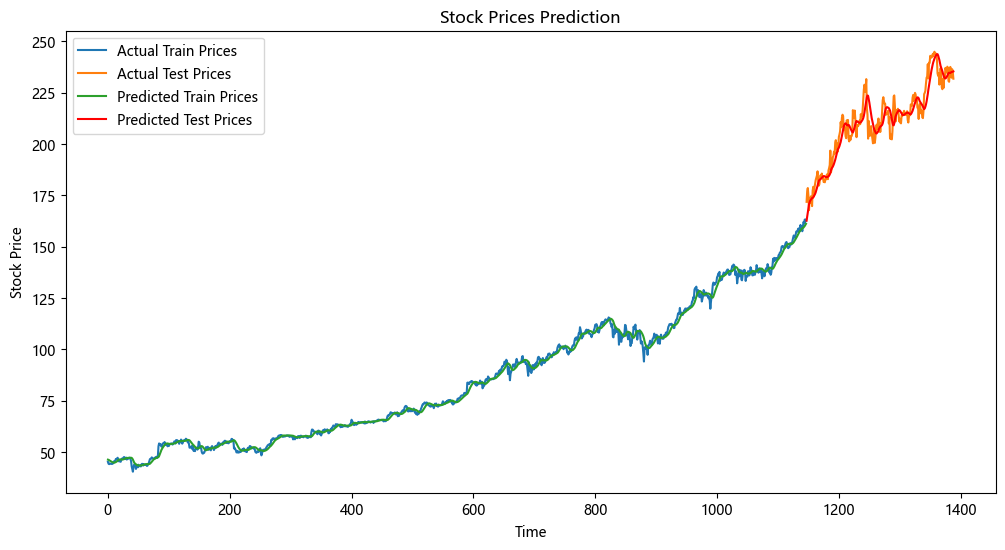

In [40]:
# 将数据分为训练集和测试集
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train, test = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :]

# 将时间序列数据转换为具有指定时间步长的数据集
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# 将数据重塑为 X=t 和 Y=t+1 的形式，X（自变量或输入）是在时间点 t 的数据， Y（因变量或输出）是在时间点 t+1 的数据。
look_back = 60
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# 数据重构为 [样本数, 时间步长, 特征数] 的格式
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# 构建模型
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(100))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# 训练模型
model.fit(X_train, Y_train, epochs=20, batch_size=32, verbose=1)

# 进行预测
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# 将预测值转换回原始尺度
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
Y_train_original = scaler.inverse_transform(Y_train.reshape(-1, 1))
Y_test_original = scaler.inverse_transform(Y_test.reshape(-1, 1))

# 绘制结果
plt.figure(figsize=(12, 6))
plt.plot(Y_train_original, label='Actual Train Prices')
plt.plot(np.arange(len(Y_train), len(Y_train) + len(Y_test)), Y_test_original, label='Actual Test Prices')
plt.plot(train_predict, label='Predicted Train Prices')
plt.plot(np.arange(len(Y_train), len(Y_train) + len(Y_test)), test_predict, label='Predicted Test Prices', color='red')
plt.title('Stock Prices Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.savefig('bestLSTM.png')
plt.show()